<h1 style="text-align:center; color:#207a38;"> PyGMT Tutorial (Lecture Notebook)   </h1>
<br>
<br>
<div style="text-align:center; font-size:20px">
<b> Indra R. Siregar, S.T. 
<br> Sandy K. Suhardja, Ph.D<br>
<br>
<div style="text-align:center; font-size:16px">
Department of Geophysical Engineering,<br> Universitas Pertamina<br>
    <br>
    14 December 2021
</div>

## 1. Import package

Pertama, kita import Paket PyGMT.

In [2]:
import pygmt

Dalam PyGMT, setiap plot atau peta dimulai dengan [`pygmt.Figure`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.html#pygmt.Figure) . Mirip seperti penggunaan Matplotlib.

In [3]:
fig = pygmt.Figure()

Semua fungsi PyGMT dijelaskan pada website [pygmt.org](https://www.pygmt.org/latest/). Bagian Referensi API [API Reference](https://www.pygmt.org/latest/api/index.html) (API = Application Programming Interface) menunjukkan metode plot apa yang terdapat dalam pygmt.

## 2. Plot garis pantai
Secara default, PyGMT tidak menambahkan bingkai (Frame) ke plot Anda. Misalnya, kita dapat memplot garis pantai dunia dengan proyeksi Mercator. Untuk penjelasan secara lengkap tentang garis pantai dapat dilihat di sini [`Figure.coast`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.coast.html#pygmt.Figure.coast).

Contoh peta berikut kita ingin proyeksi ke Mercator dengan ukuran 16cm.
* Menampilkan garis pantai sebagai garis hitam dengan ketebalan 0.5p --> shorelines="0.5p,black".
* Atau, secara otomatis dengan perintah --> shorelines=True.
* `Resolution` dari coastlines bisa (f)ull, h(high), (i)ntermediate, (l)ow, and (c)rude.

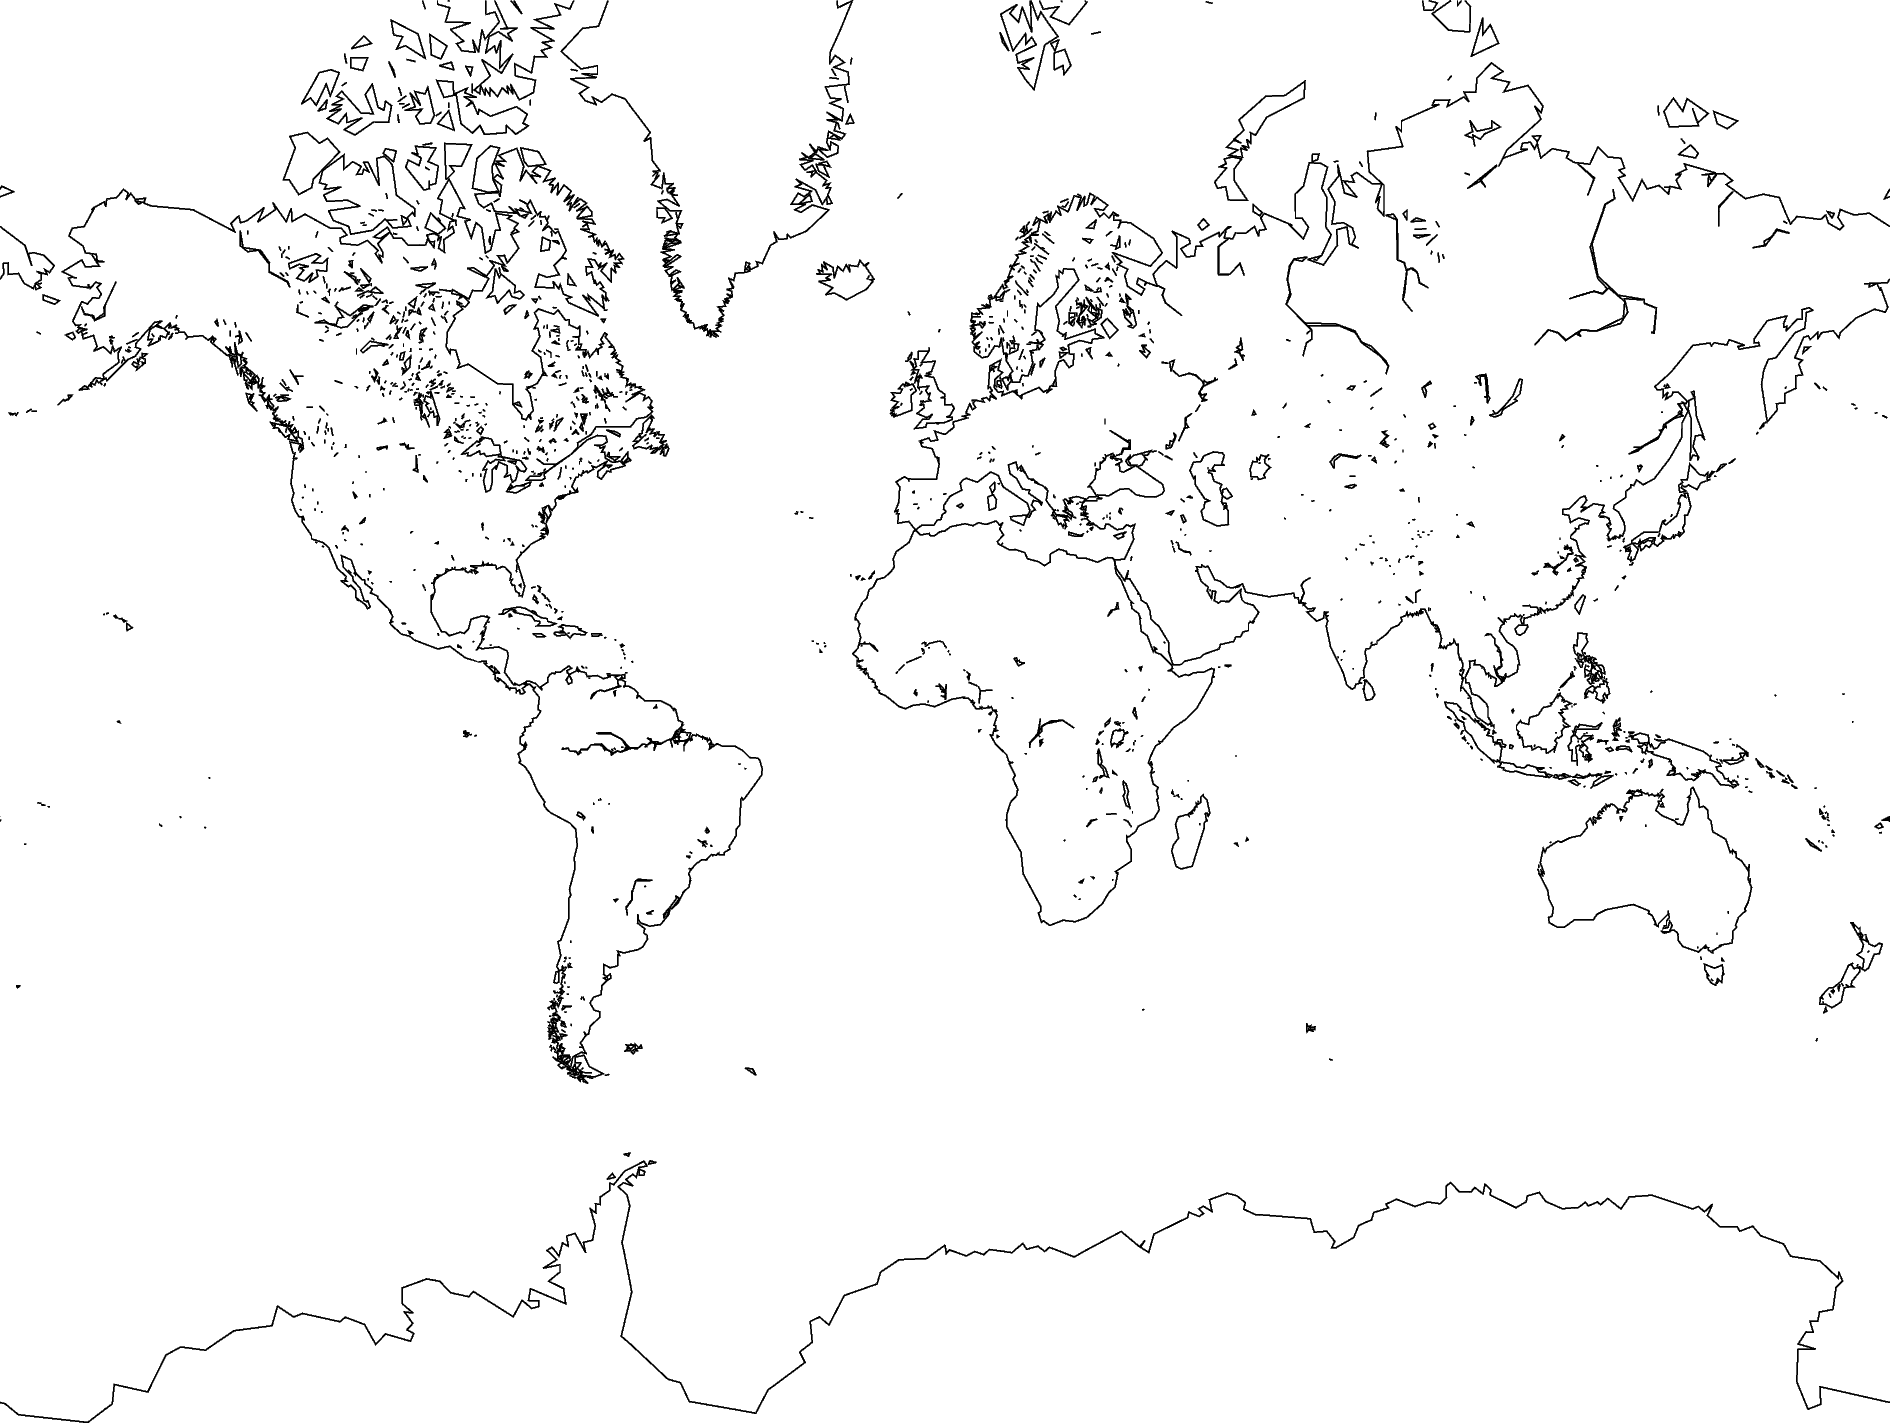

In [4]:
fig = pygmt.Figure()

fig.coast(shorelines=True, region=[-180, 180, -80, 80], projection="M16c", resolution='c')
fig.show()

Kita juga dapat menampilkan peta tersebut menggunakan pdf viewer dengan `fig.show(method='external')`.

In [5]:
fig.show(method='external')

## 3. Plot garis pantai dengan frame
Membuat Frame pada plot garis pantai.
* `frame='f'`: tanpa koordinat di frame.
* `frame='a'` & `frame=True`: koordinat di frame.
* `frame='ag'`: koordinat dan grid line di frame.
* `frame='40'`: koordinat setiap 40 derajat.
* `frame=["xa40g40", "ya40g40"]`: koordinat setiap 40 dan gridline setiap 40 derajat baik x maupun y.
* `frame=["xa40g60", "ya40g60"]`: koordinat setiap 40 dan gridline setiap 60 derajat baik x maupun y.
* `frame=["xa40g40pf10", "ya40g40pf10"]`.


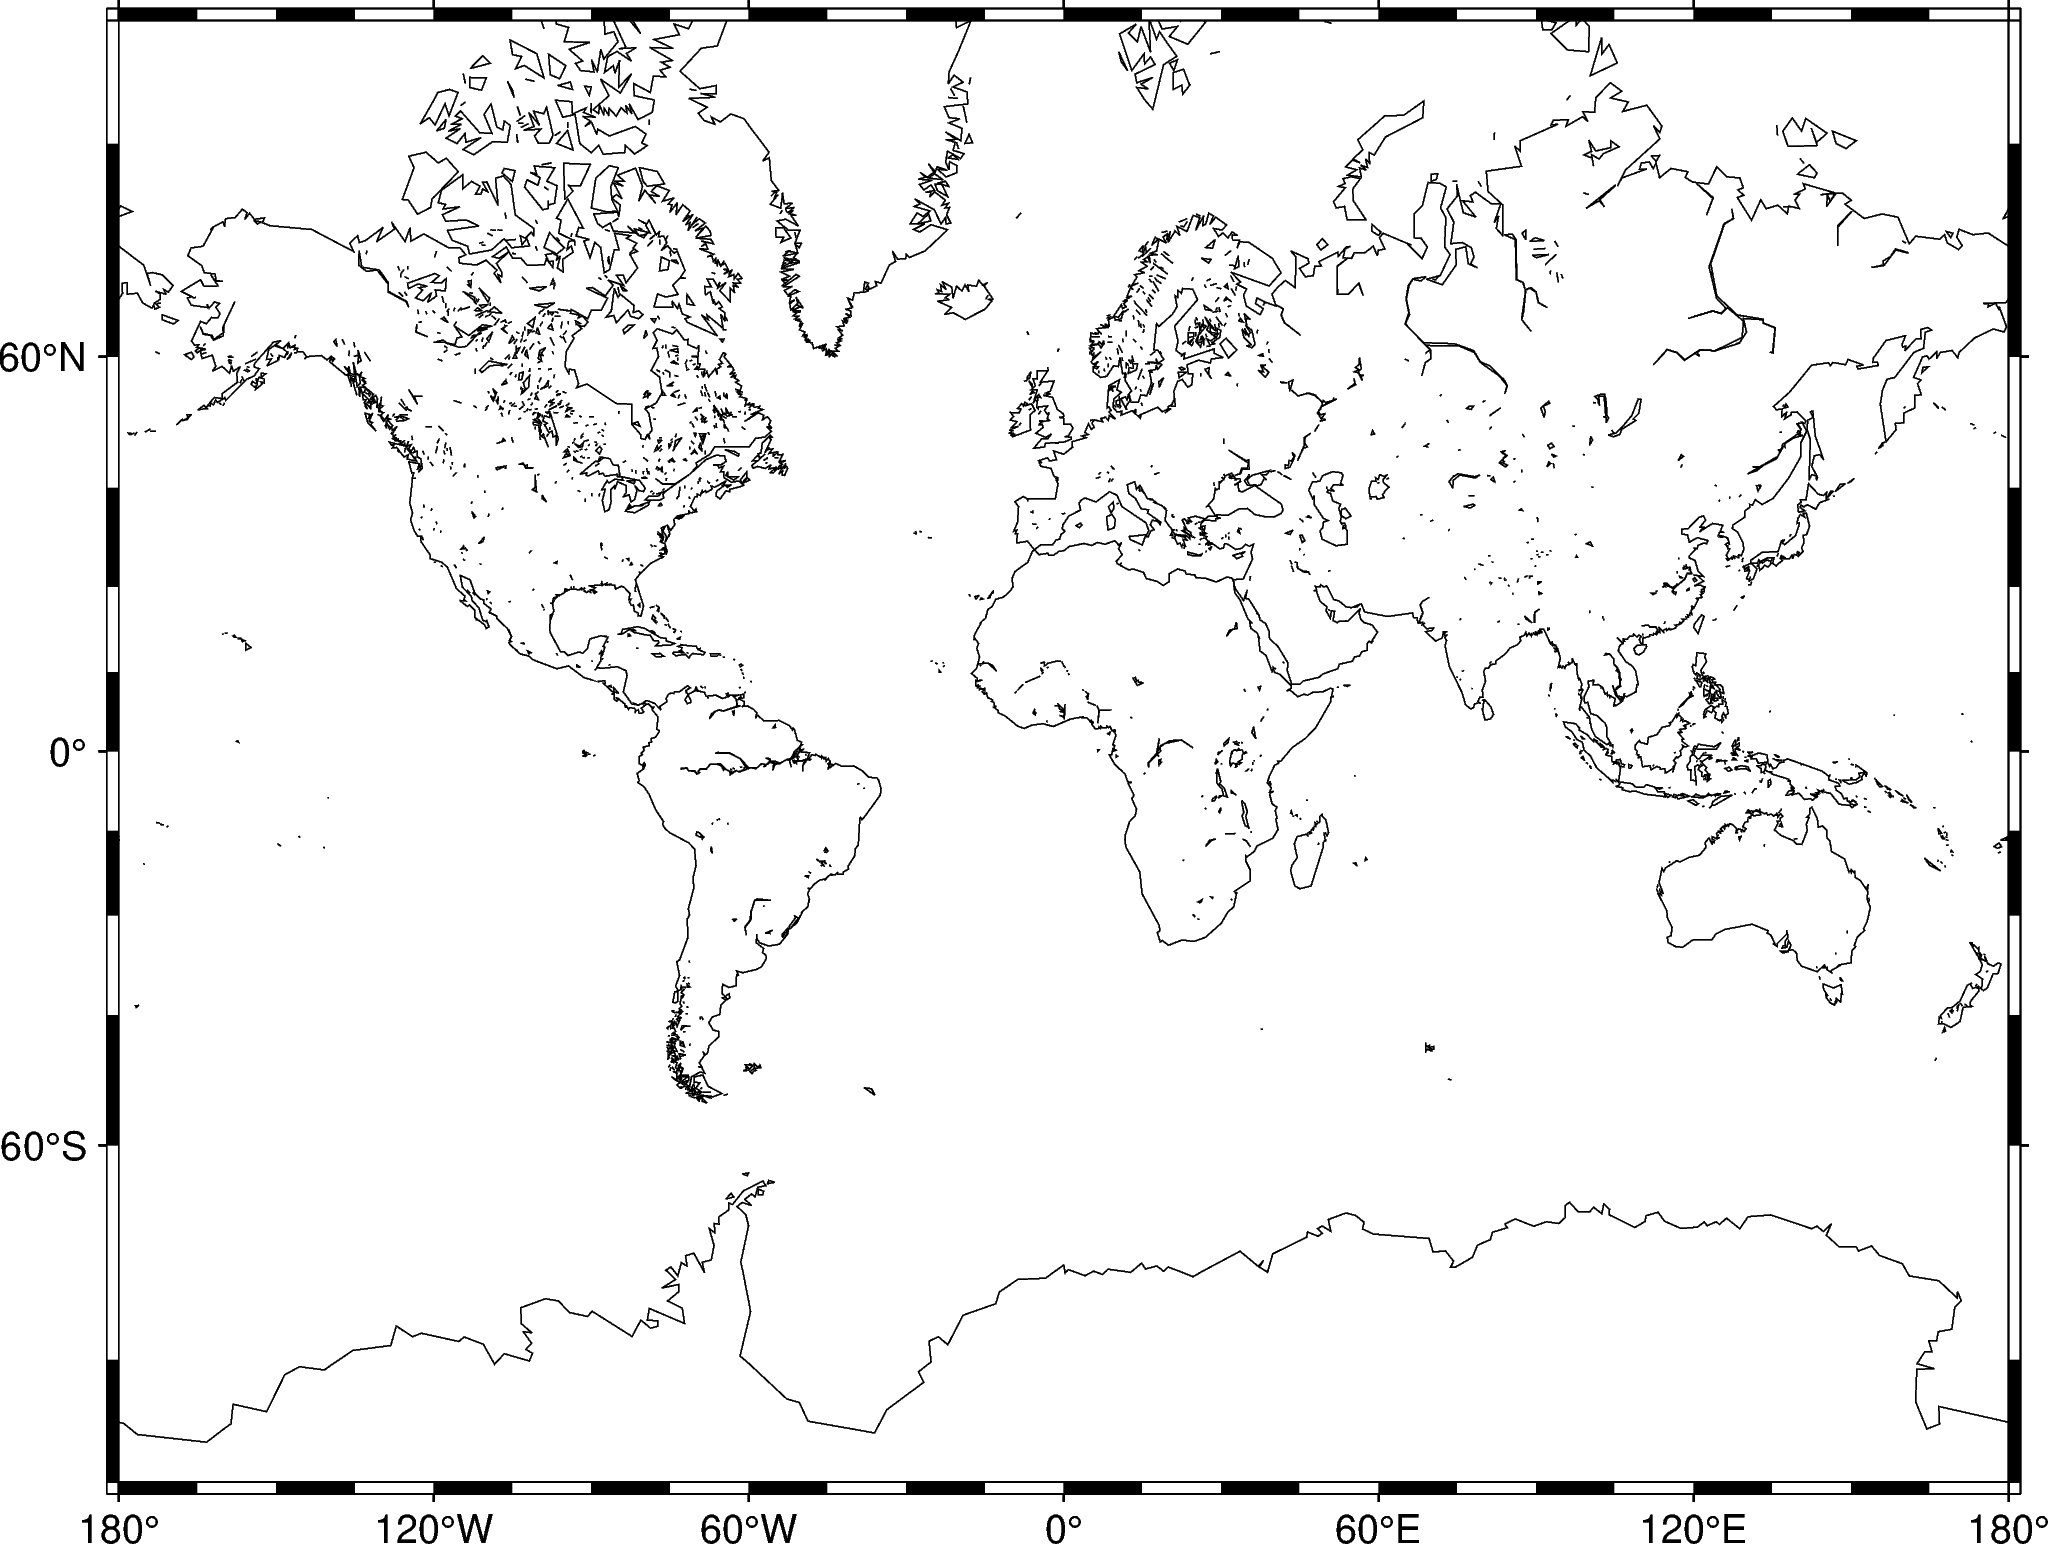

In [7]:
fig = pygmt.Figure()
fig.coast(shorelines=True, region=[-180, 180, -80, 80], projection="M16c", frame='af')
fig.show()
fig.show(method='external')

Atau dengan cara lain menggunakan `fig.basemap(frame="a")` seperti berikut ini.

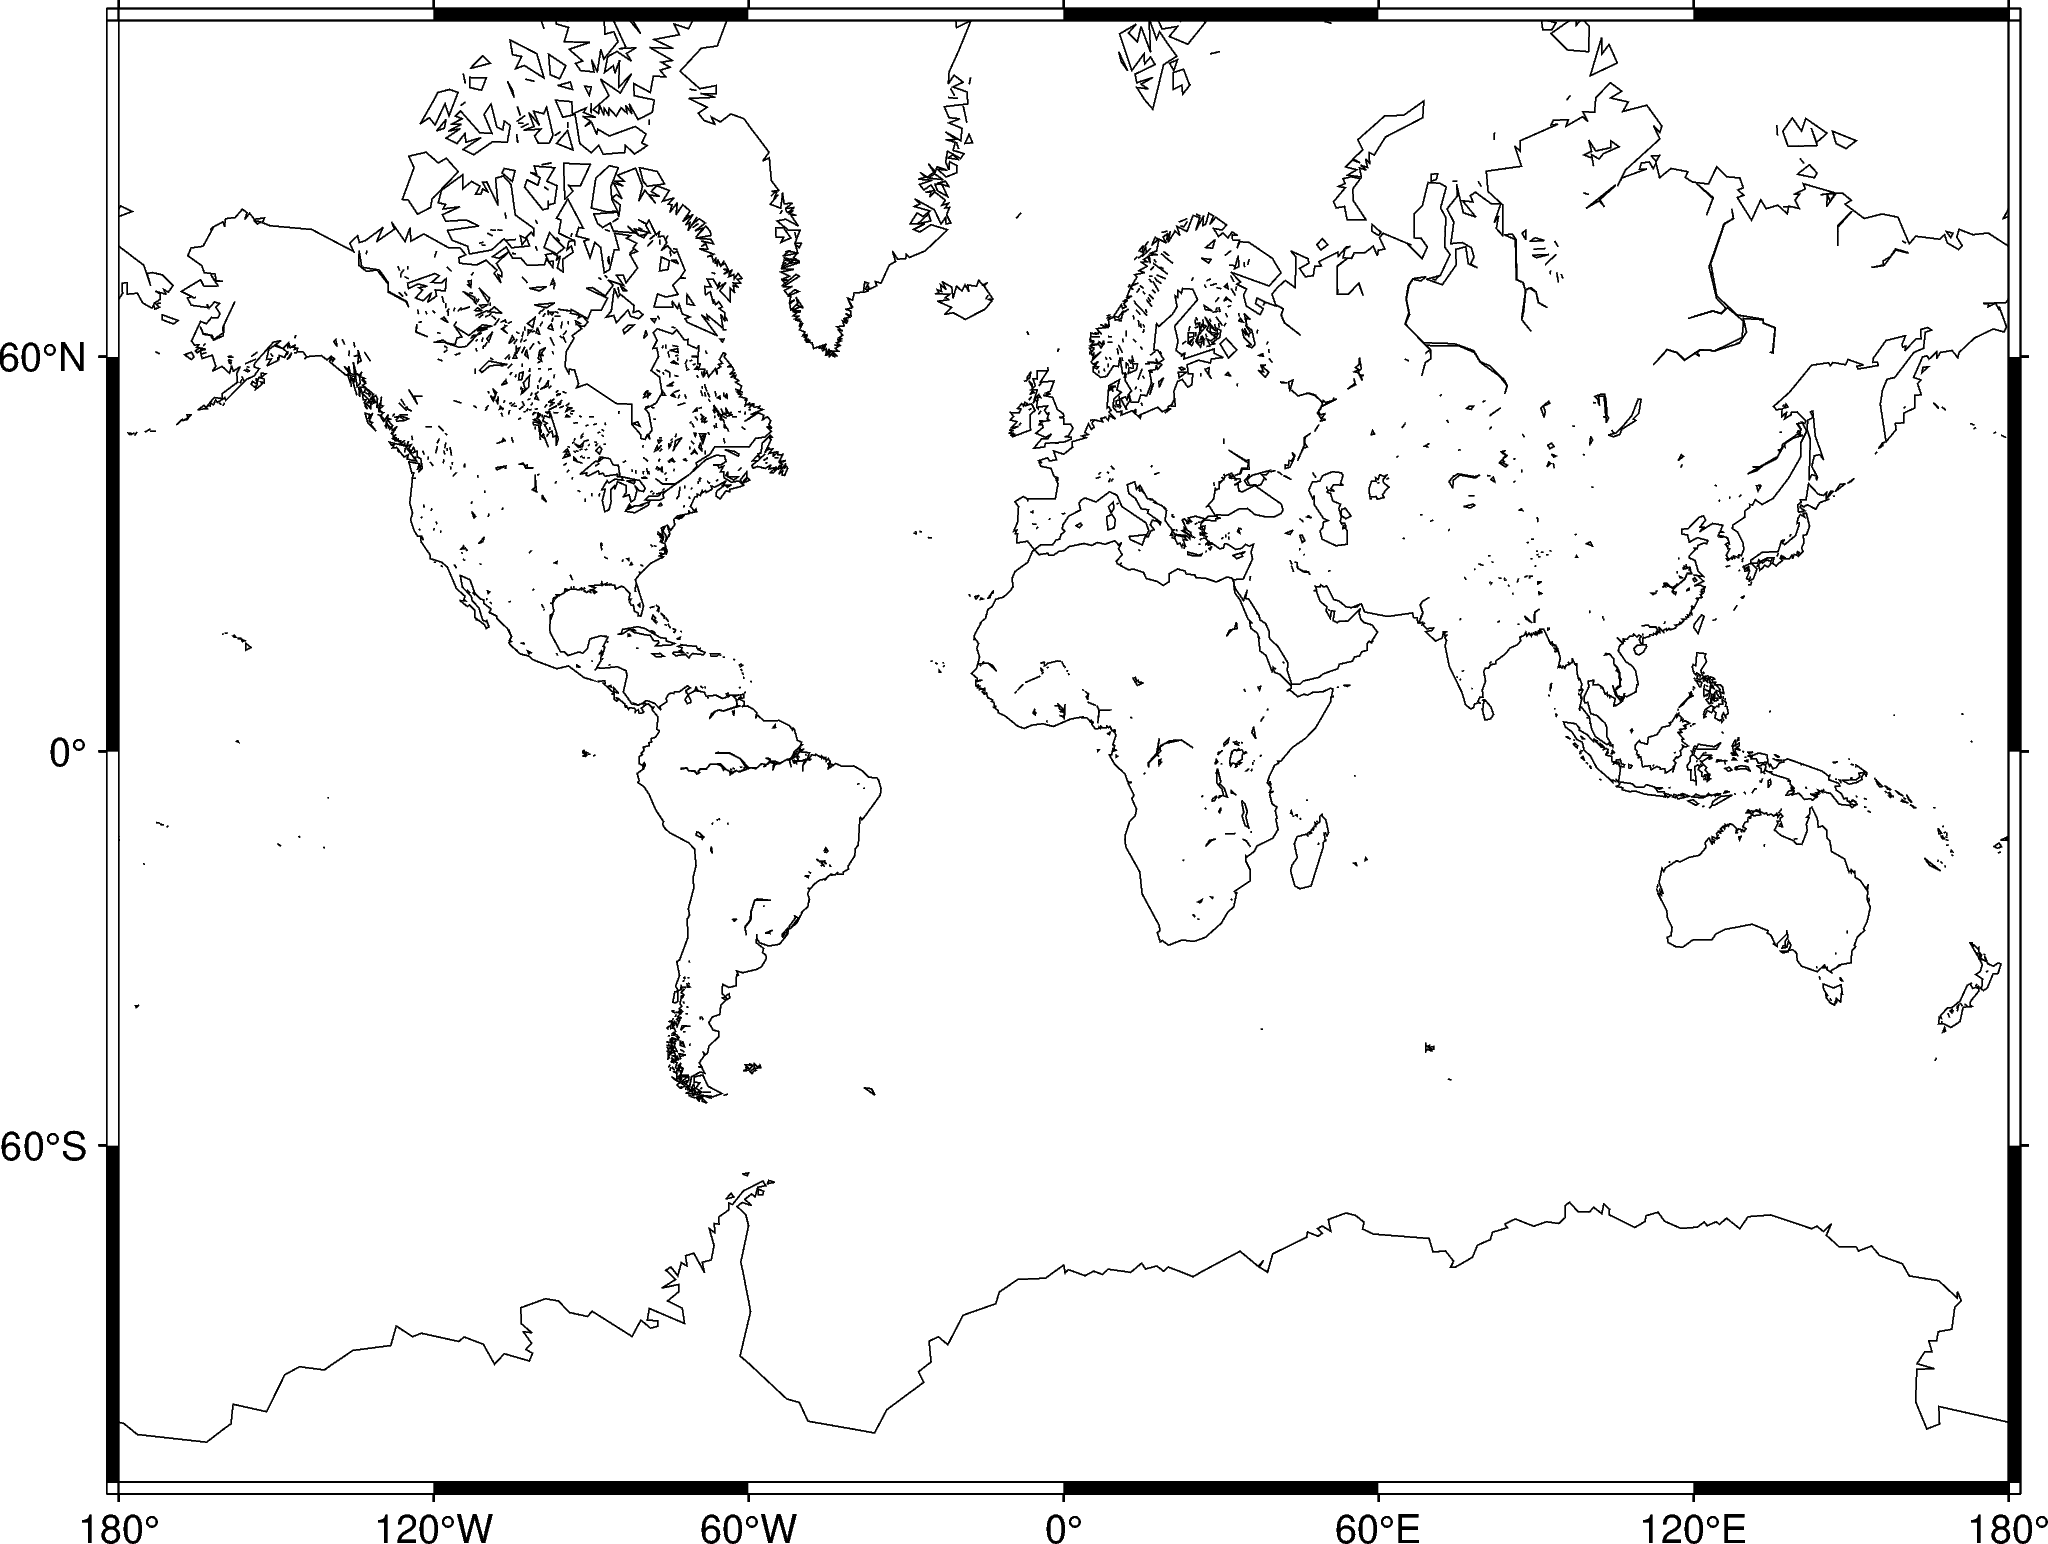

In [8]:
fig = pygmt.Figure()
fig.coast(shorelines=True, region=[-180, 180, -80, 80], projection="M16c")
fig.basemap(frame="a")
fig.show()
# fig.show(method='external')

## 4. Pengaturan warna land dan water
* Pengaturan warna dapat menggunakan [`Kode Warna RGB`](https://www.rapidtables.com/web/color/RGB_Color.html).
* Contoh: `'#33D148'`

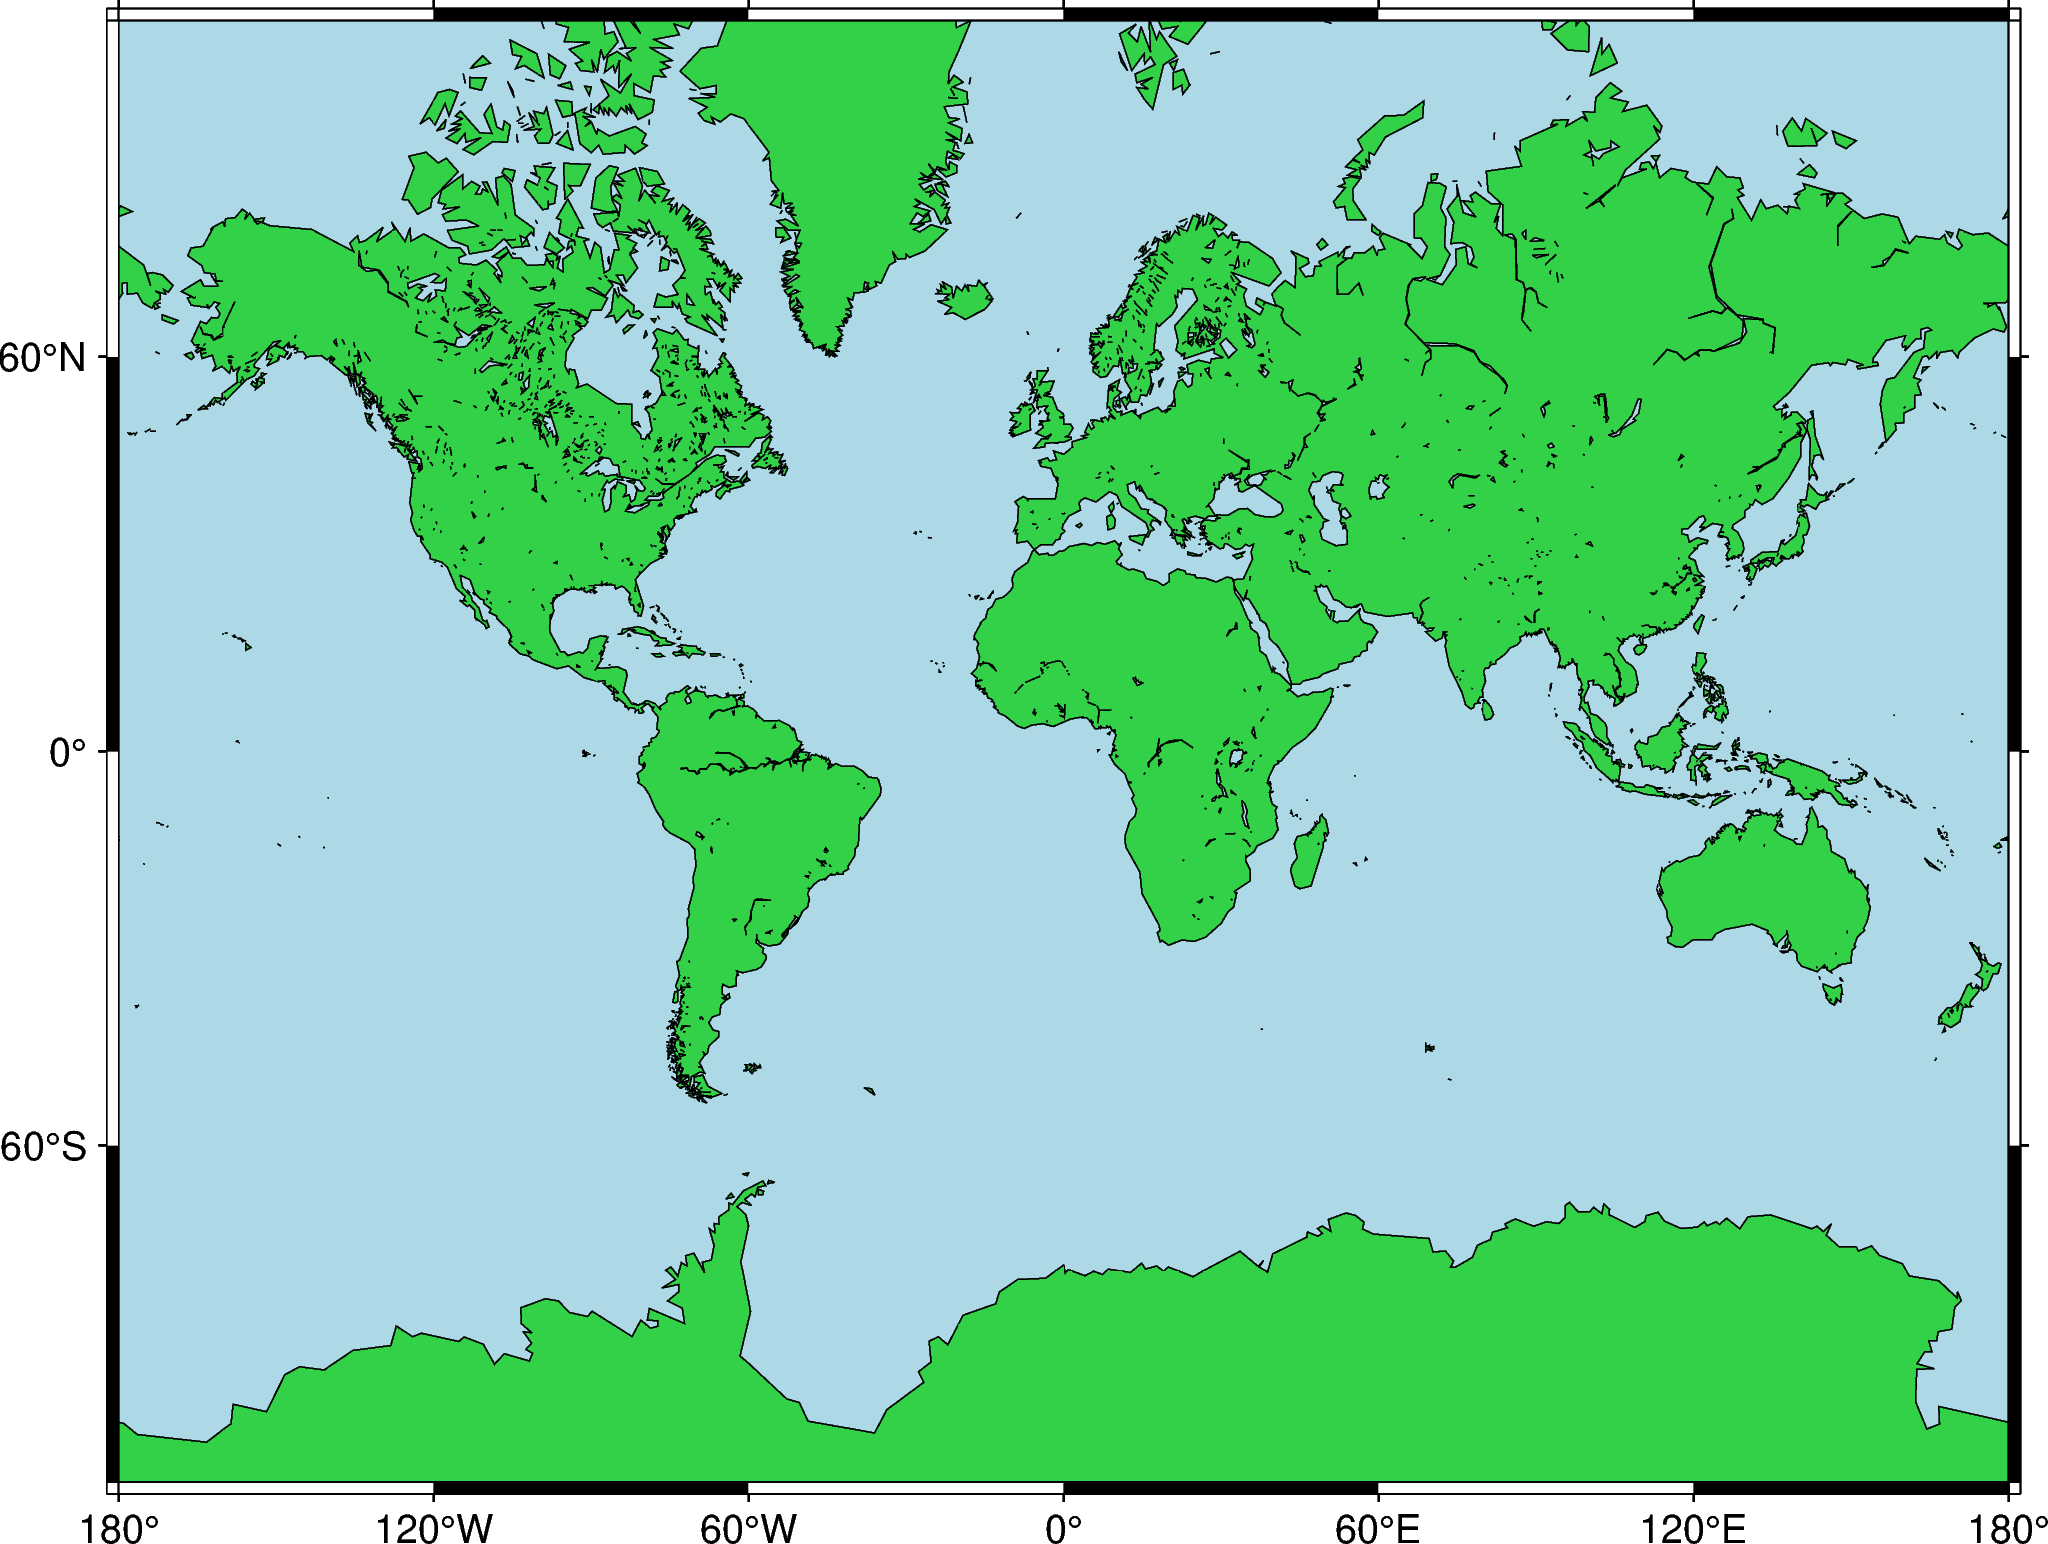

In [10]:
fig = pygmt.Figure()
fig.coast(shorelines=True, region=[-180, 180, -80, 80], projection="M16c", frame='a',
          land='grey', water='lightblue')
fig.show()
fig.show(method='external')

Kita juga dapat menyimpan gambar tersebut menggunakan perintah `fig.savefig()`.

In [12]:
save = r"D:\training_pygmt\saveplot" + "/" + "Coastlines_test" + '.png'
fig.savefig(save)

## 5. Menambahkan Judul

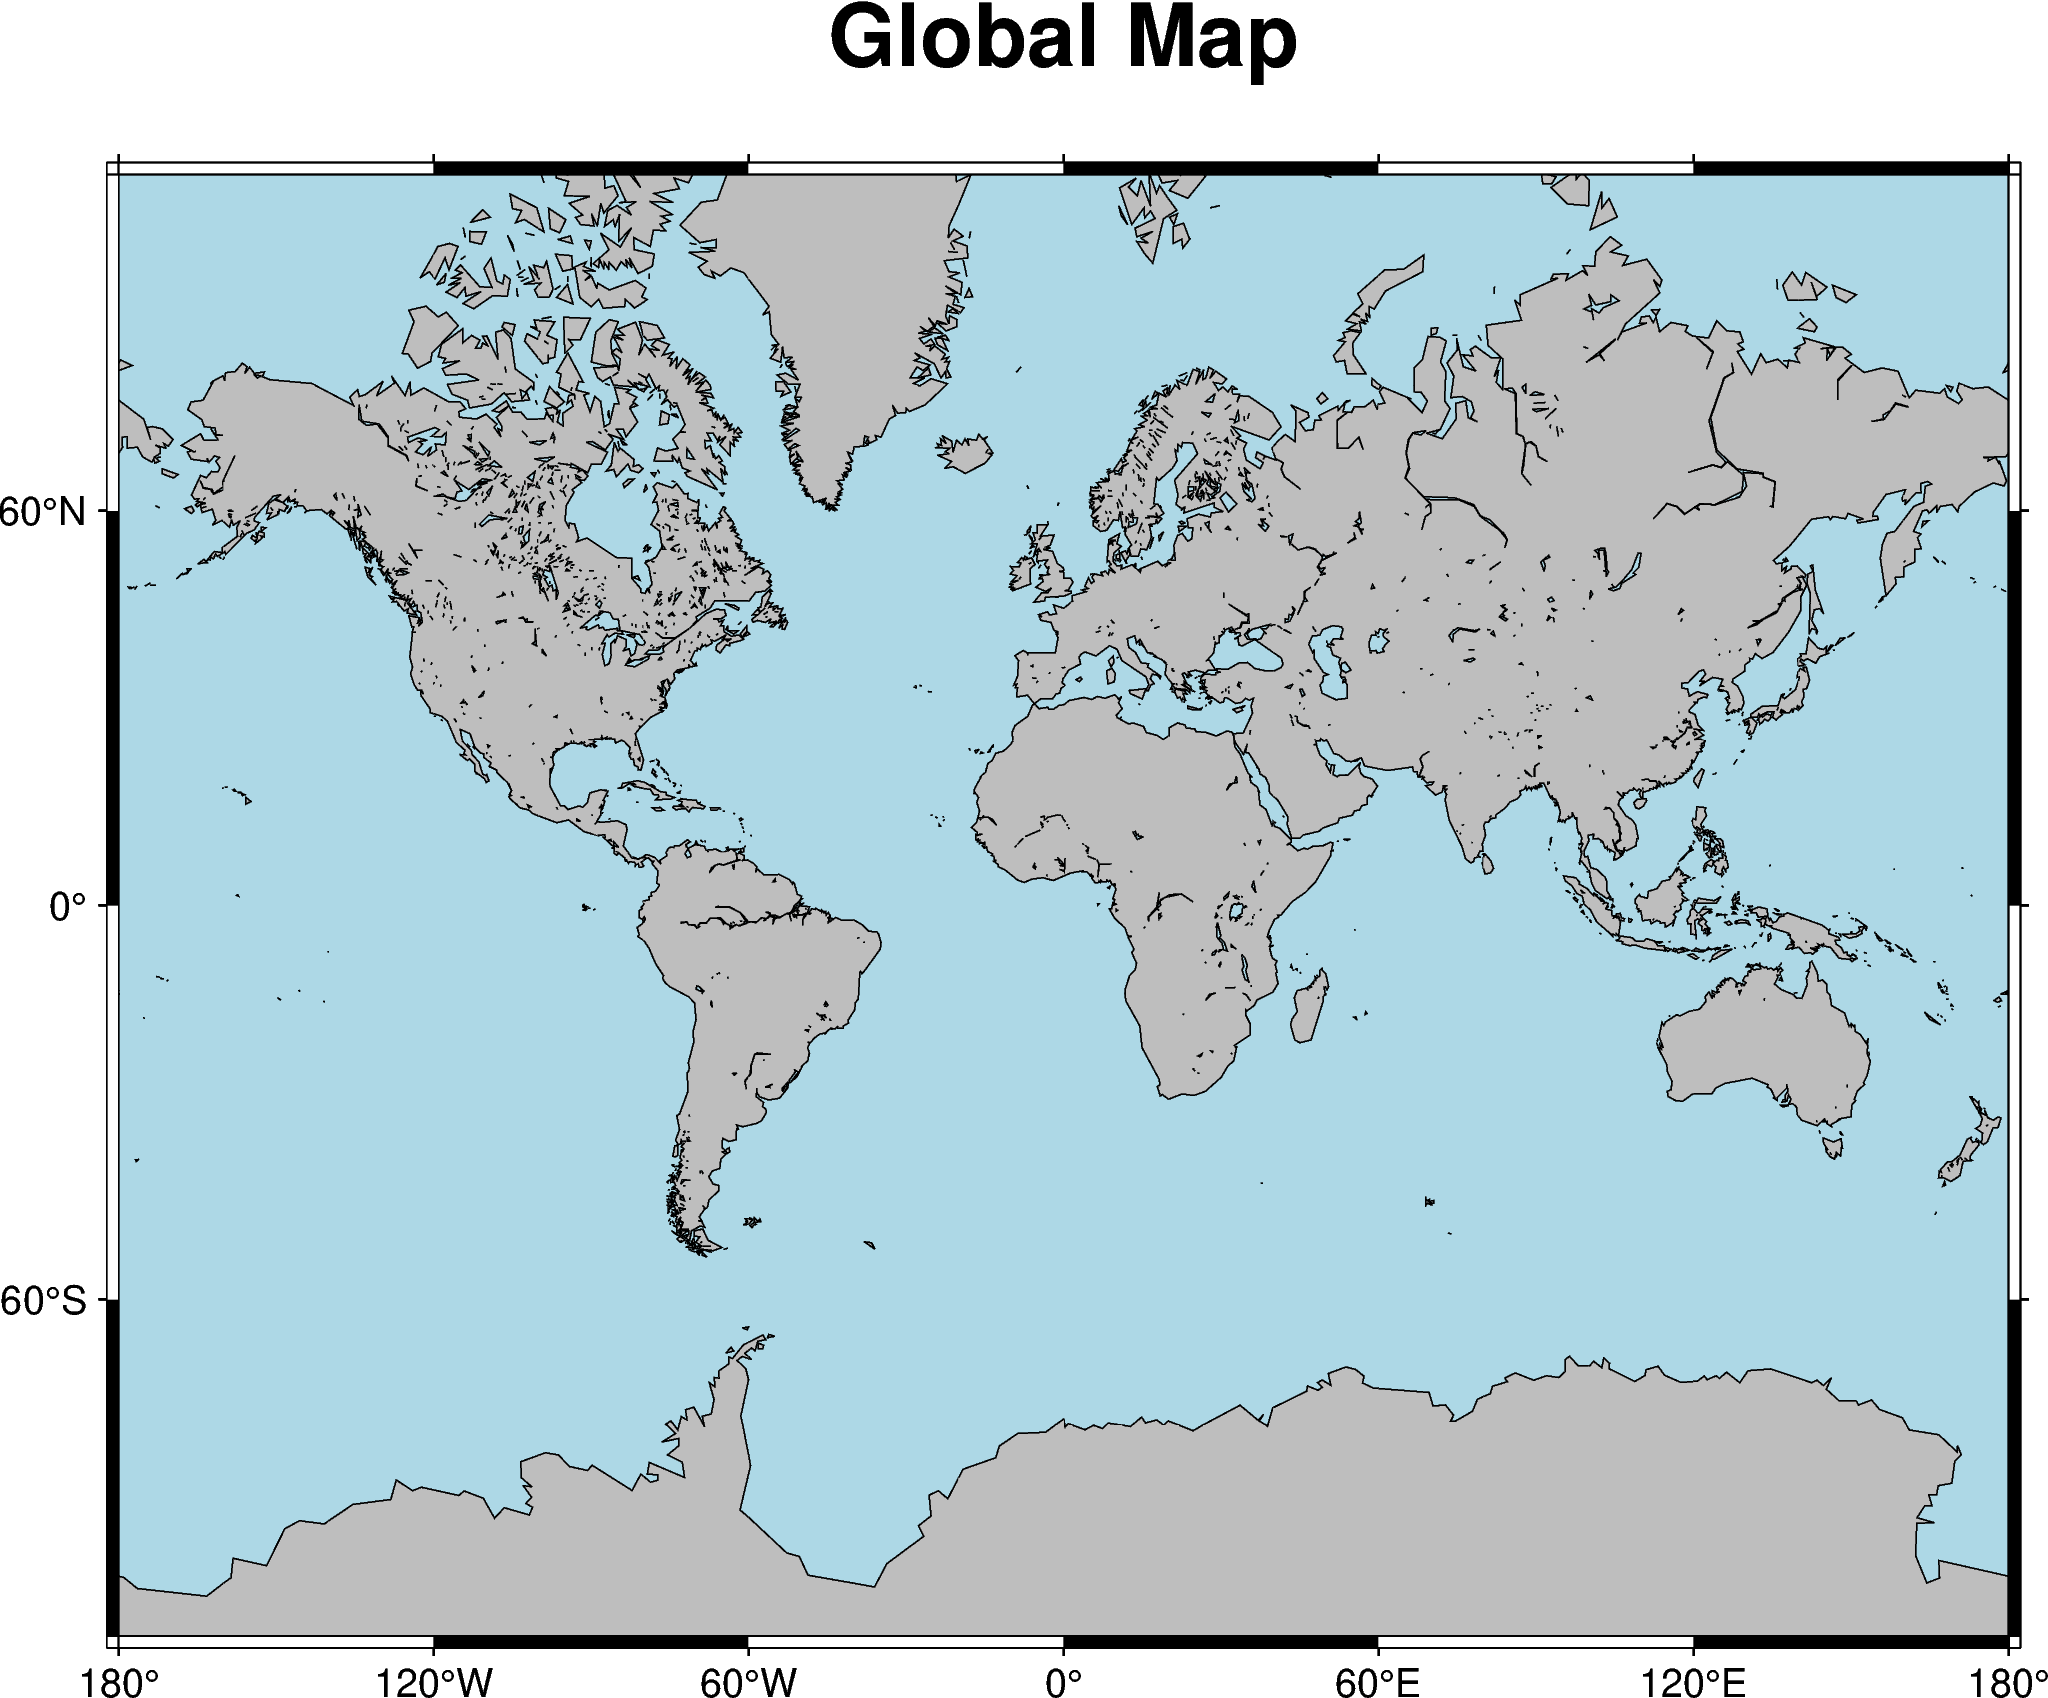

In [13]:
fig = pygmt.Figure()
fig.coast(shorelines=True, region=[-180, 180, -80, 80], projection="M16c",
         land='grey', water='lightblue')
fig.basemap(frame=["a", '+t"Global Map"'])
fig.show()

## 6. Pengaturan Region

* Selanjutnya, kita akan membahas tentang argumen `region` pada pyGMT. Argumen `region` digunakan untuk mengatur atau mengontrol luas geografis atau Cartesian dari suatu gambar yang ingin ditampilkan.
* Dalam pyGMT kita menggunakan list `[xmin, xmax, ymin, ymax]` yang mewakili `[longitude minimum, longitude maksimum, latitude minimum, dan latitude maksimum`. Seperti contoh: [95, 140, -10, 6] untuk menampilkan wilayah Indonesia.
* Penjelasan secara lengkap tentang [`Pengaturan Region`](https://www.pygmt.org/dev/tutorials/basics/regions.html).

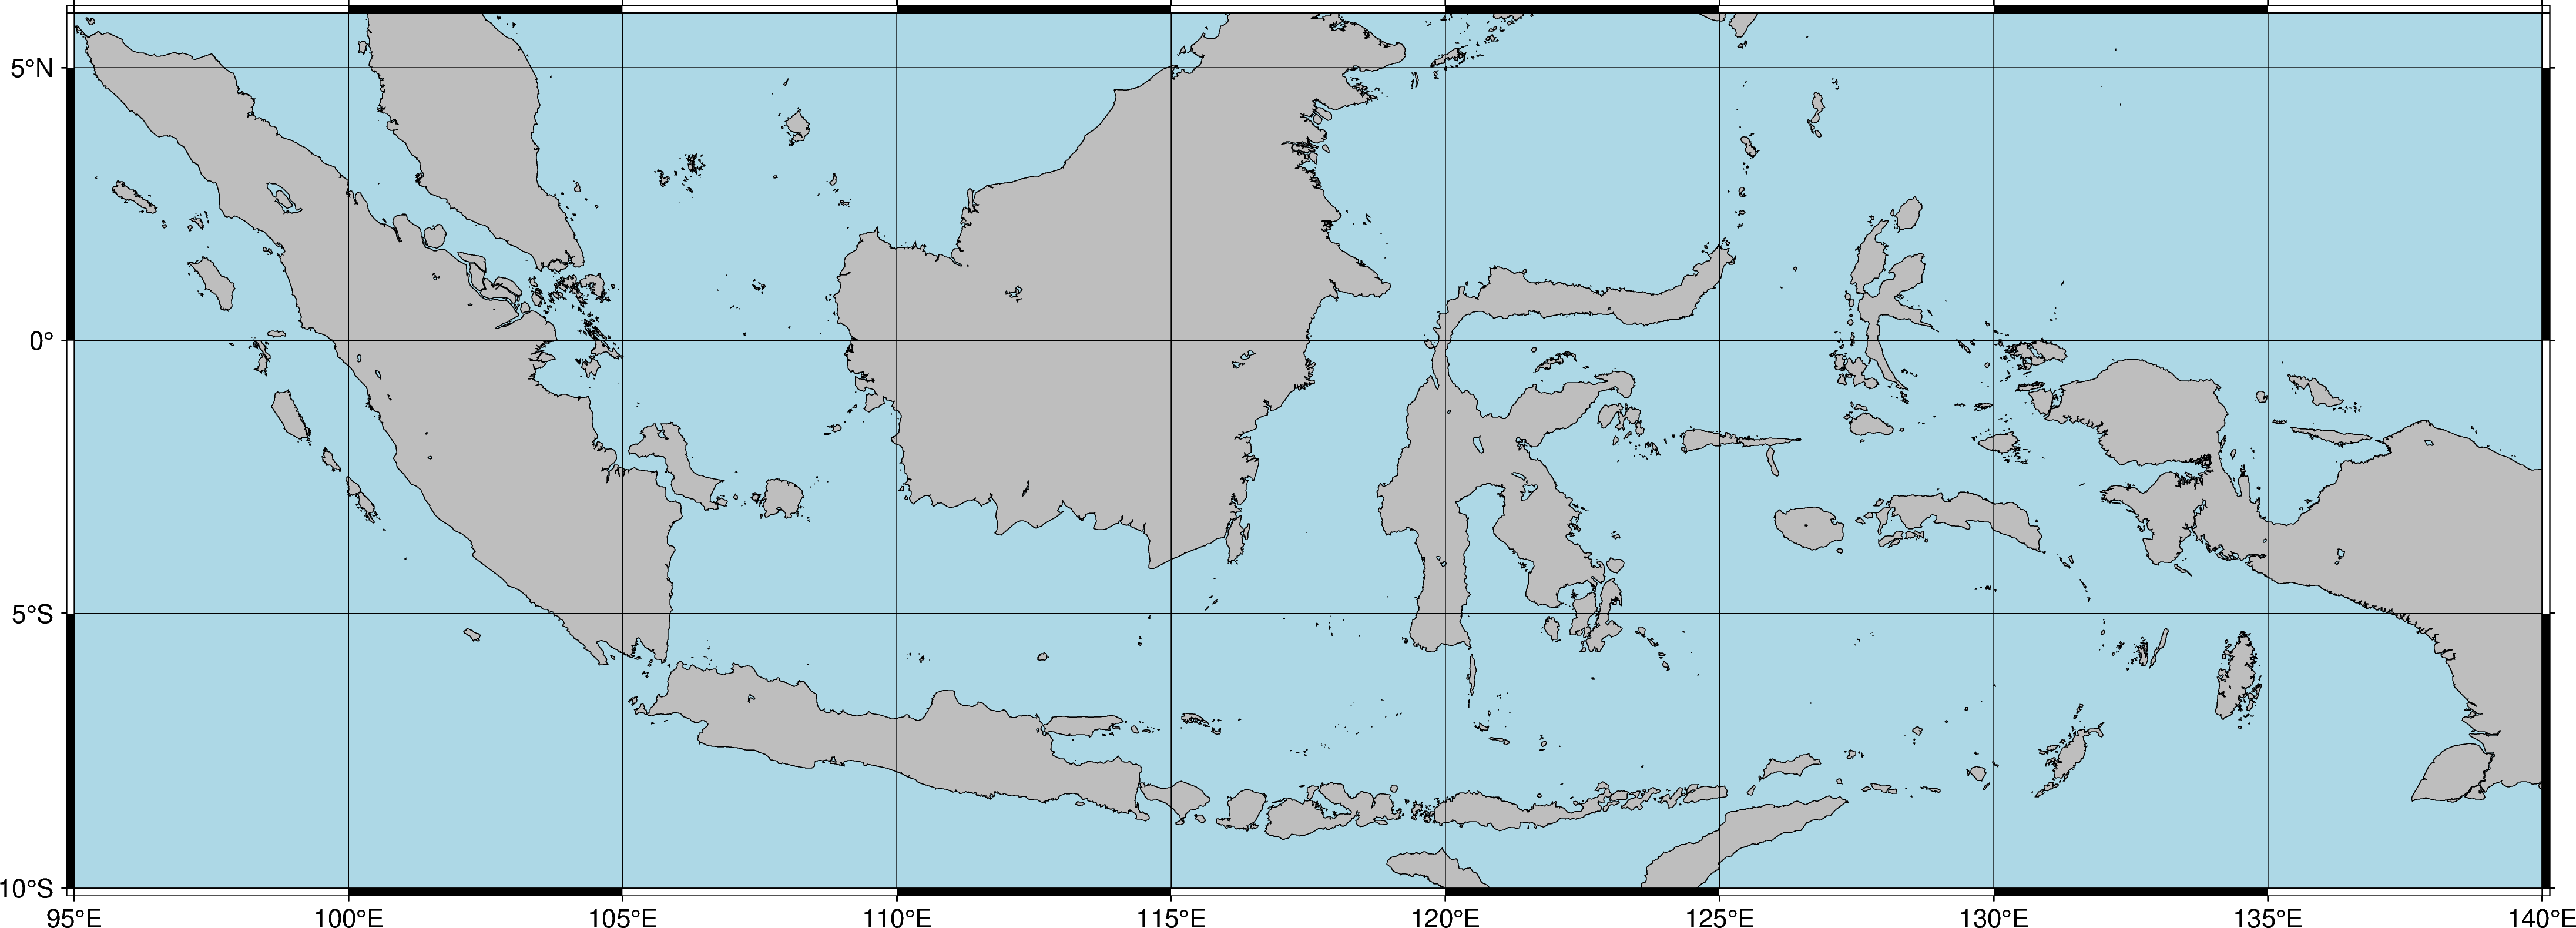

In [14]:
import pygmt
fig = pygmt.Figure()
fig.coast(
    region=[95, 140, -10, 6],
    projection='M14i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame='ag'
)
fig.show()
fig.show(method='external')

Tidak hanya sampai di sini, pyGMT juga mendukung pengunaan `ISO Country Code` sebagai input `region`. Seperti contoh kita dapat menggunakan kode `'ID'` untuk menampilkan `region` Indonesia. [ISO codes](https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes).

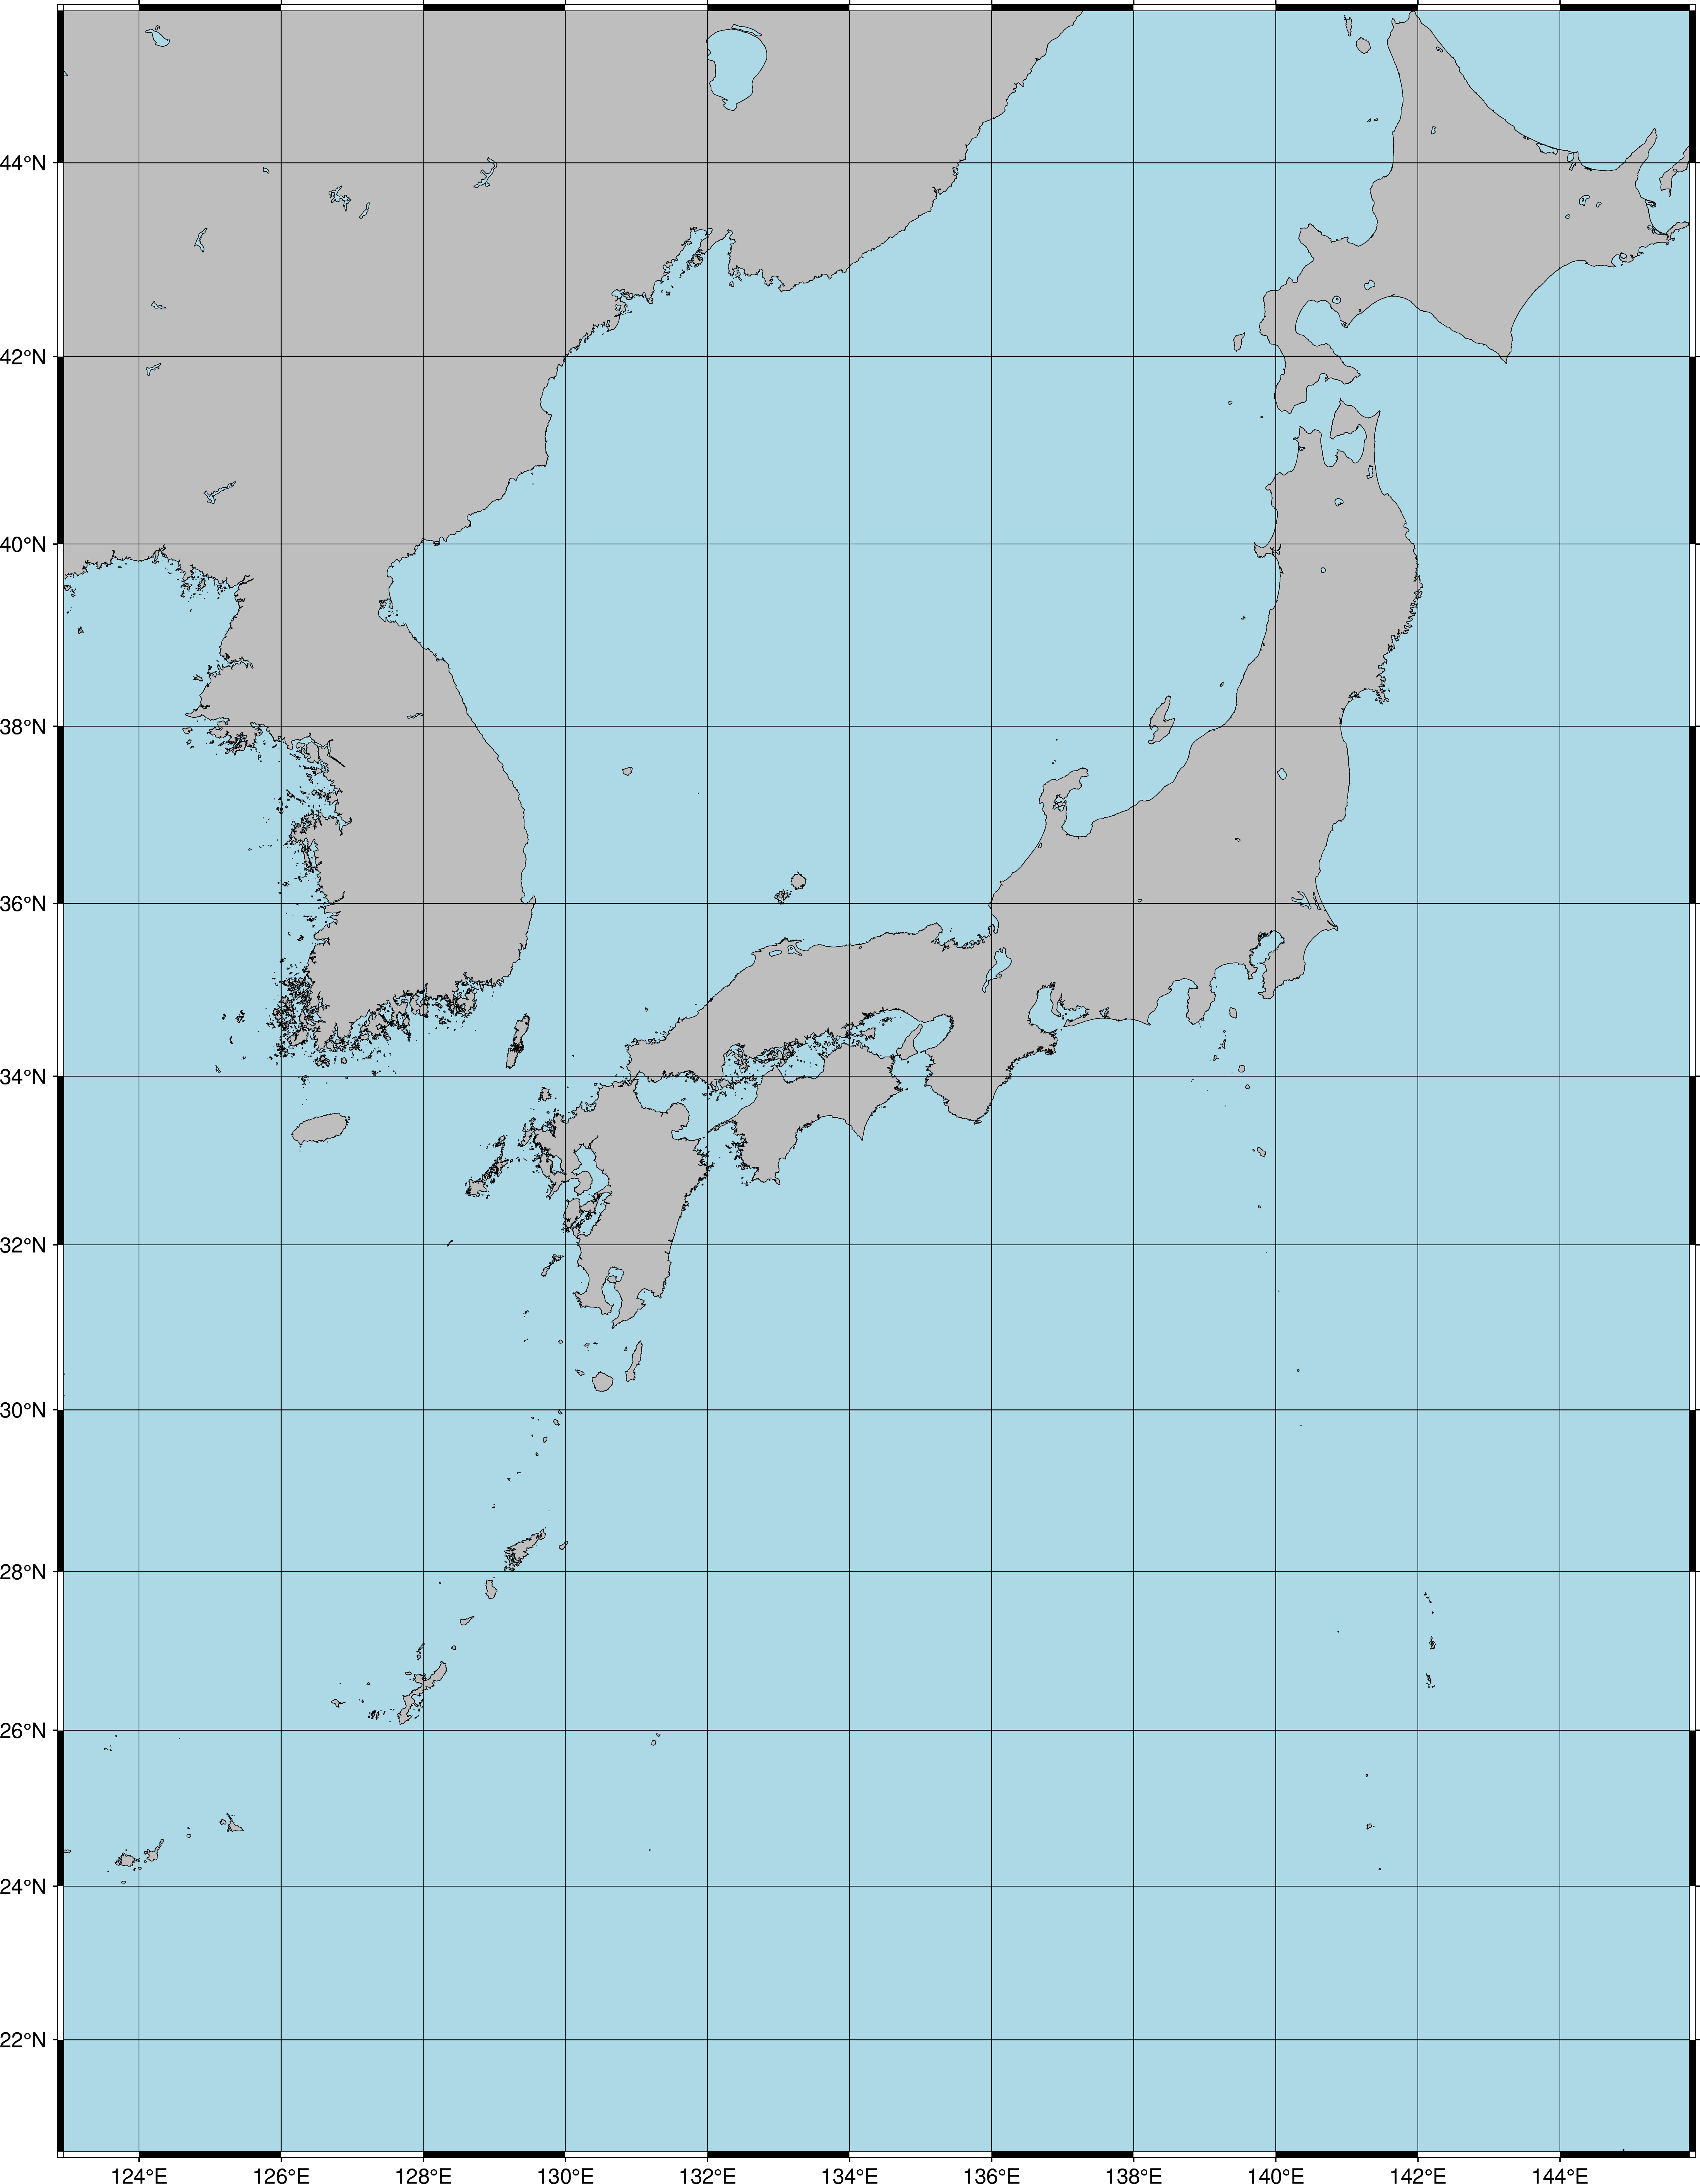

In [16]:
fig = pygmt.Figure()
fig.coast(
    region='JP',
    projection='M14i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame='ag'
)

fig.show()
fig.show(method='external')

save = r"D:\training_pygmt\saveplot" + "/" + "Indonesia_map" + '.png'
fig.savefig(save)

Kita juga dapat menggunakan kode `g` untuk menampilkan domain global.

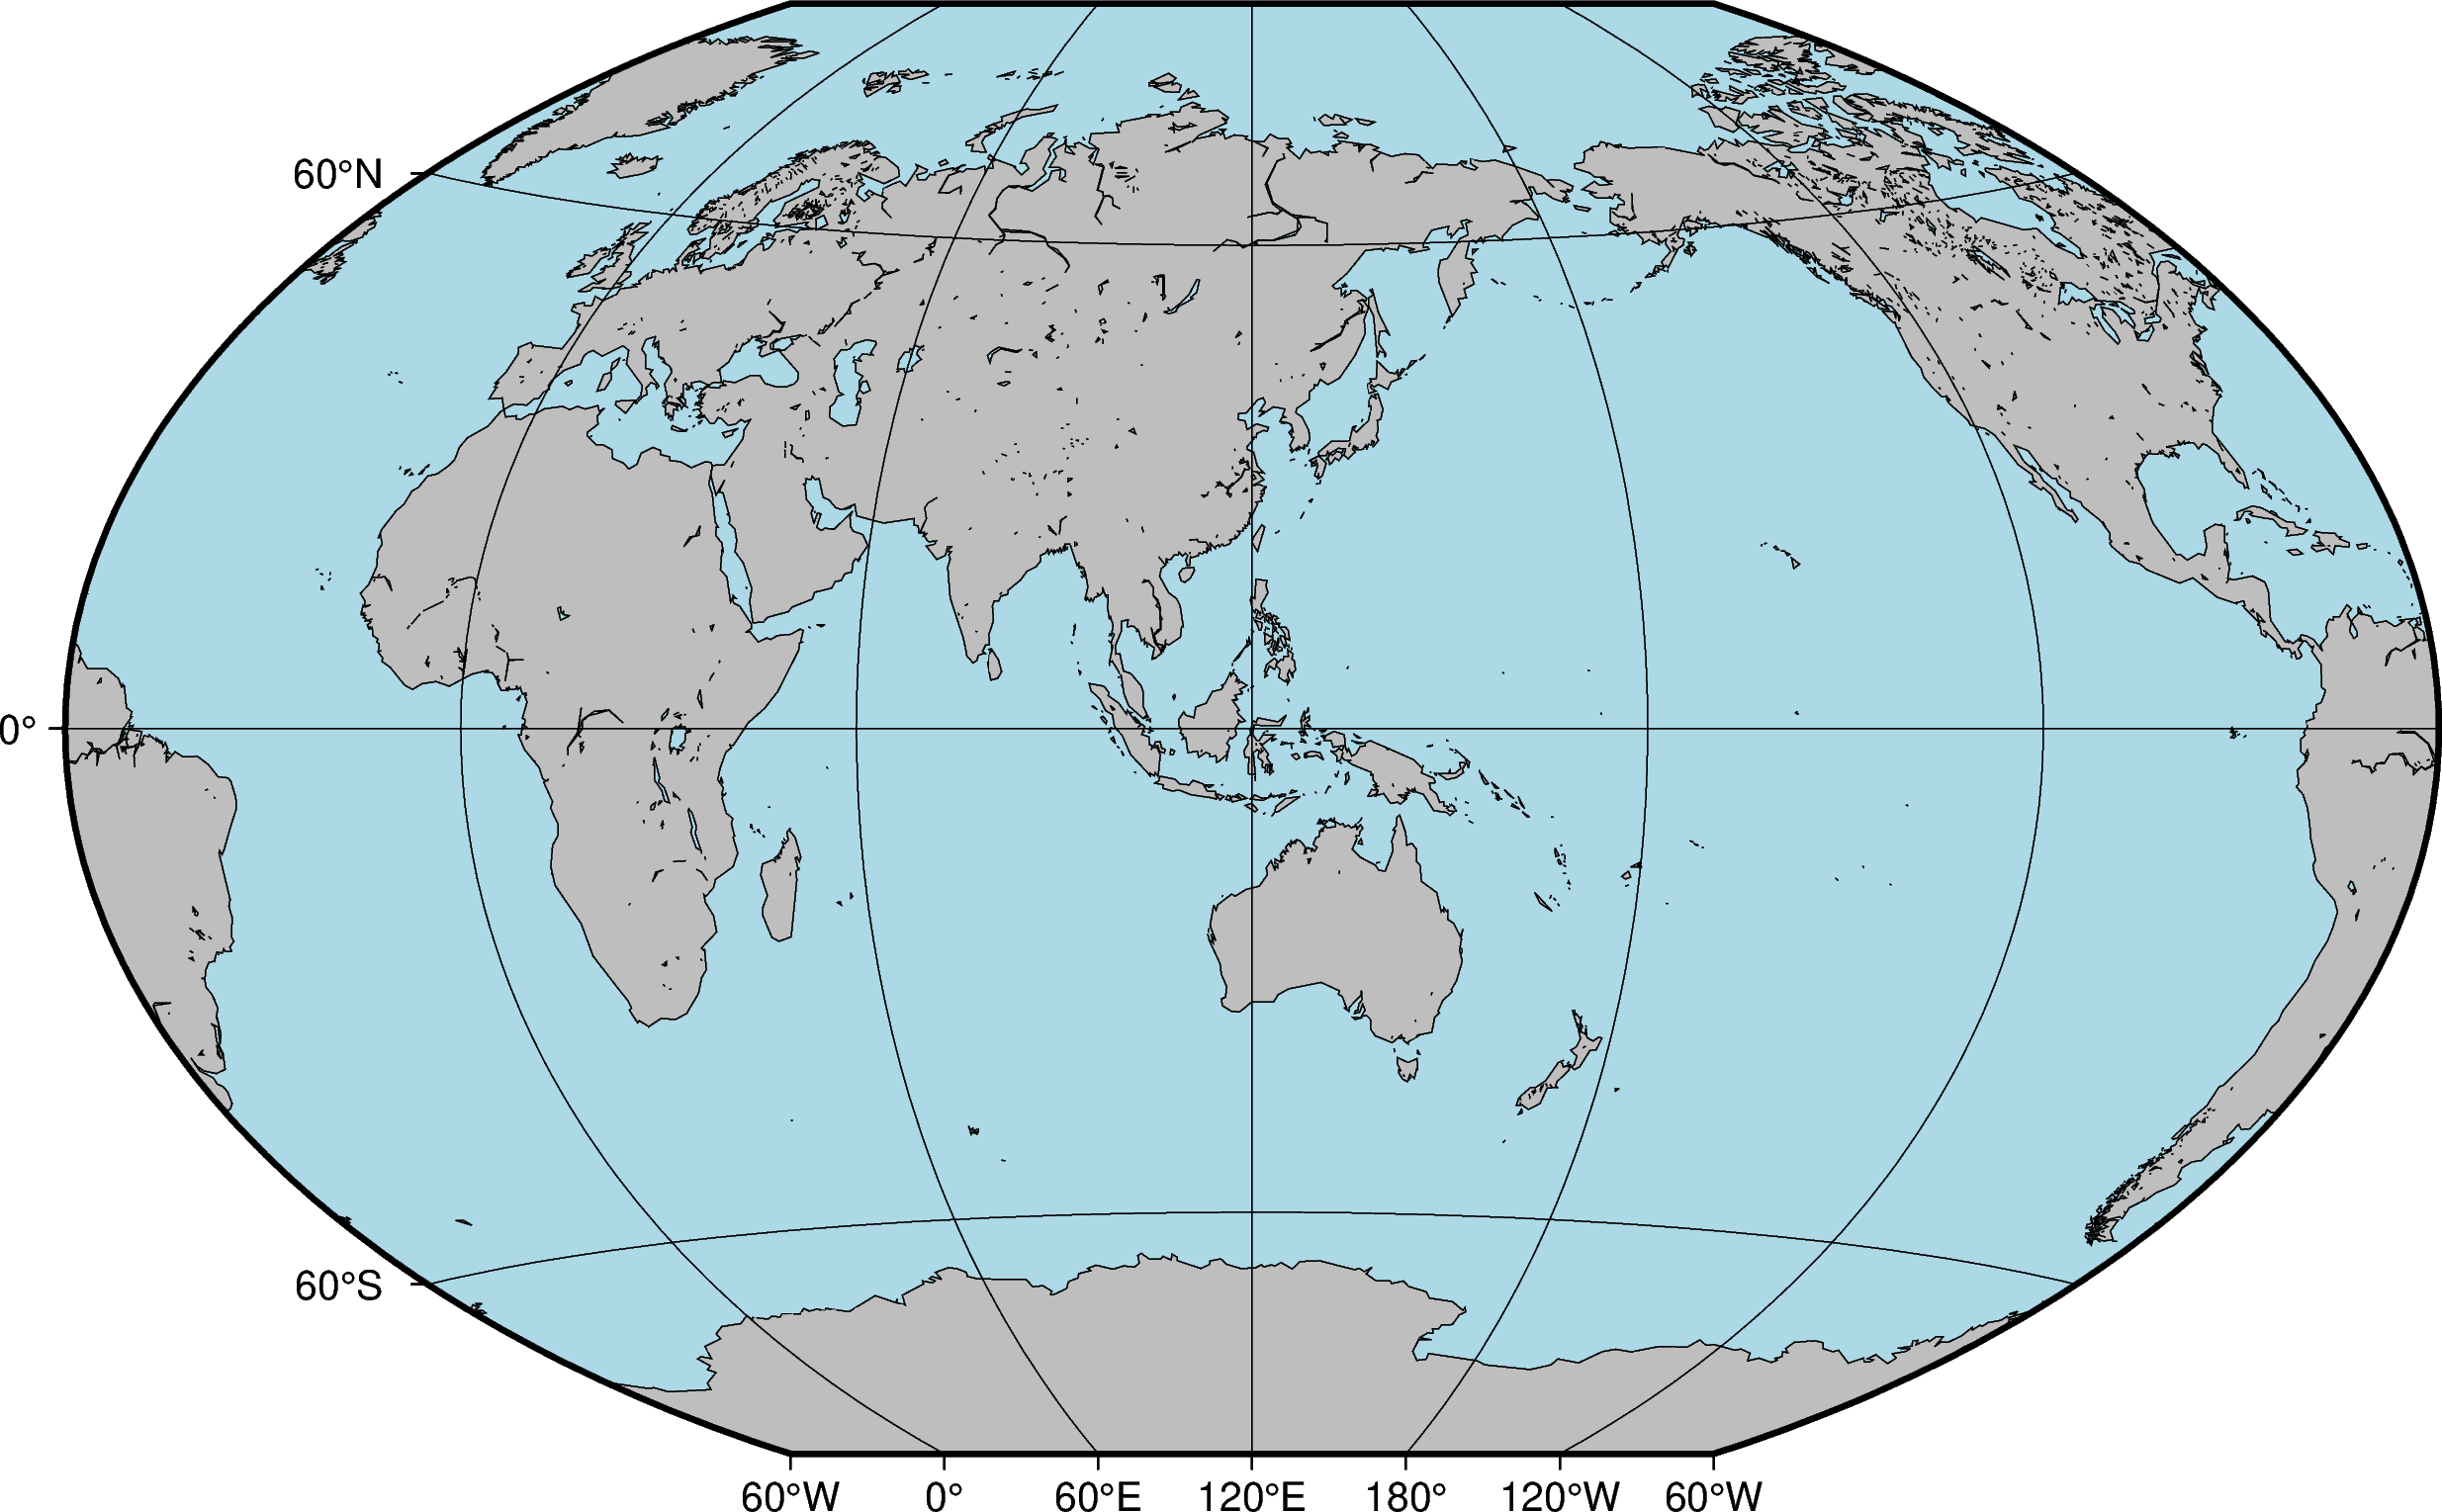

In [19]:
fig = pygmt.Figure()
fig.coast(
    region='g',
    projection='R120/8i', #R sebagai proyeksi Winkel Tripel (bisa diganti menjadi R120 agar posisi pusatnya pas di Indonesia)
    shorelines=True,
    water='lightblue',
    land='grey',
    frame='ag',
)
fig.show()
fig.show(method='external')

save = r"D:\training_pygmt\saveplot" + "/" + "Global_map" + '.png'
fig.savefig(save)

## 7. Menambah Inset Map
Metode `pygmt.Figure.inset` dipanggil menggunakan pernyataan `with`.
#### Pada argumen `position`:
* j: posisi inset map (kontak dengan sumbu tertentu).
* BL: bottom left; BR: bottom right; TL: Top Left; TR: Top Right; MR: Middle Right.
* w3c : lebar inset 3cm.
* o0.5c/0.2c : offset inset sepanjang sumbu-x dan sumbu-y. Artinya, inset digeser 0.5cm pada sumbu-x dan 0.2cm pada sumbu-y.

#### Pada argumen `box`:
Argumen `box` mengatur isi dan batas dari inset. 
* pblack: tepi inset berwarna hitam.
* gred : isi inset berwarna merah.

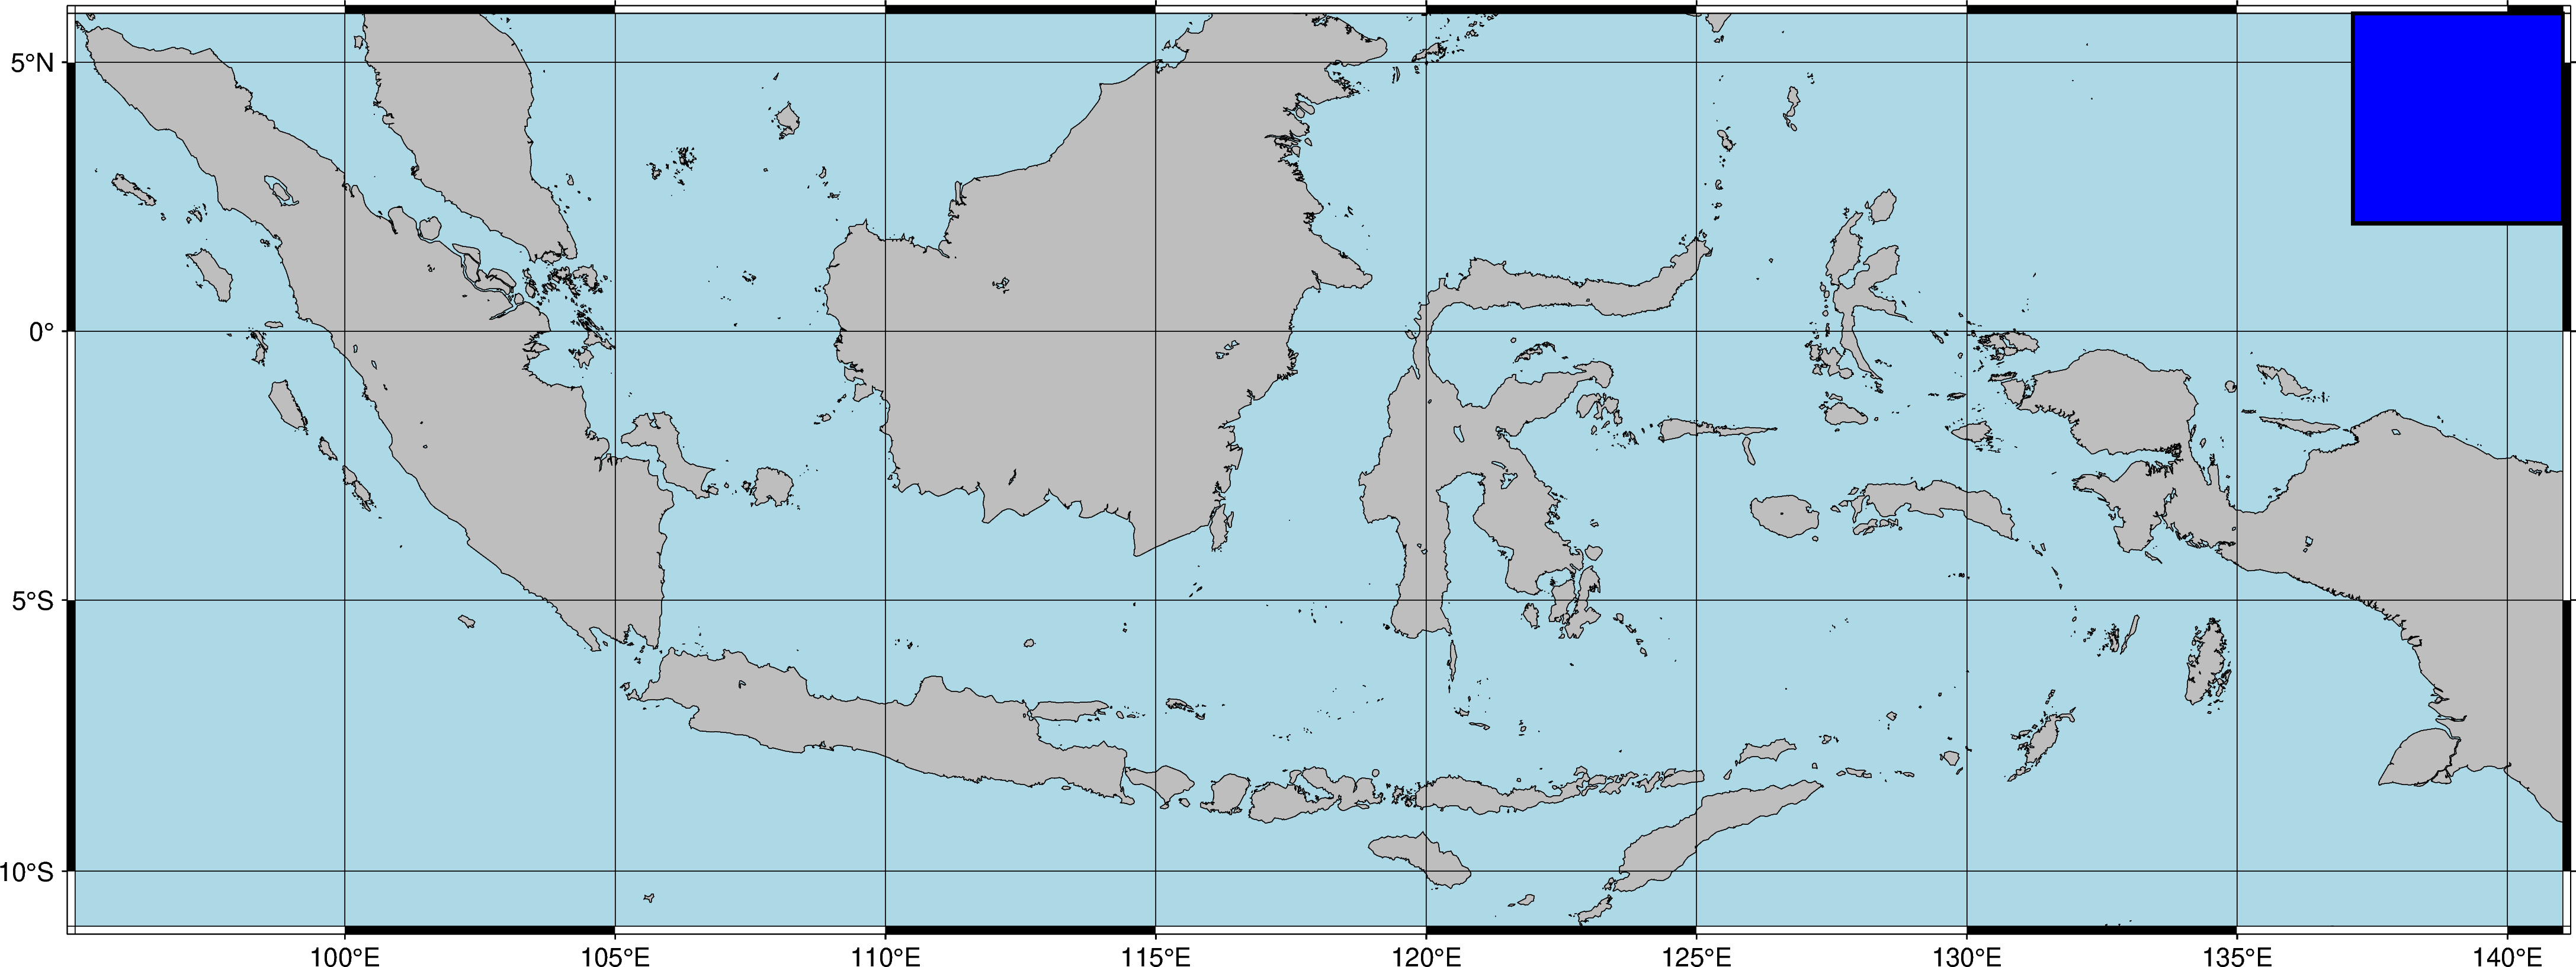

In [21]:
fig = pygmt.Figure()
fig.coast(
    region='ID',
    projection='M14i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame='ag'
)
with fig.inset(position="jTR+w3c", box="+pblack+gblue"):
    # pass is used to exit the with statement as no plotting functions are called
    pass

fig.show()
fig.show(method='external')

Kemudian, kita juga dapat menggeser inset menggunakan `o` pada argumen `position`. Pada contoh ini, kita menggeser inset sebesar 0.5cm pada sumbu-x dan 0.2cm pada sumbu-y menggunakan `+o0.5c/0.2c`.

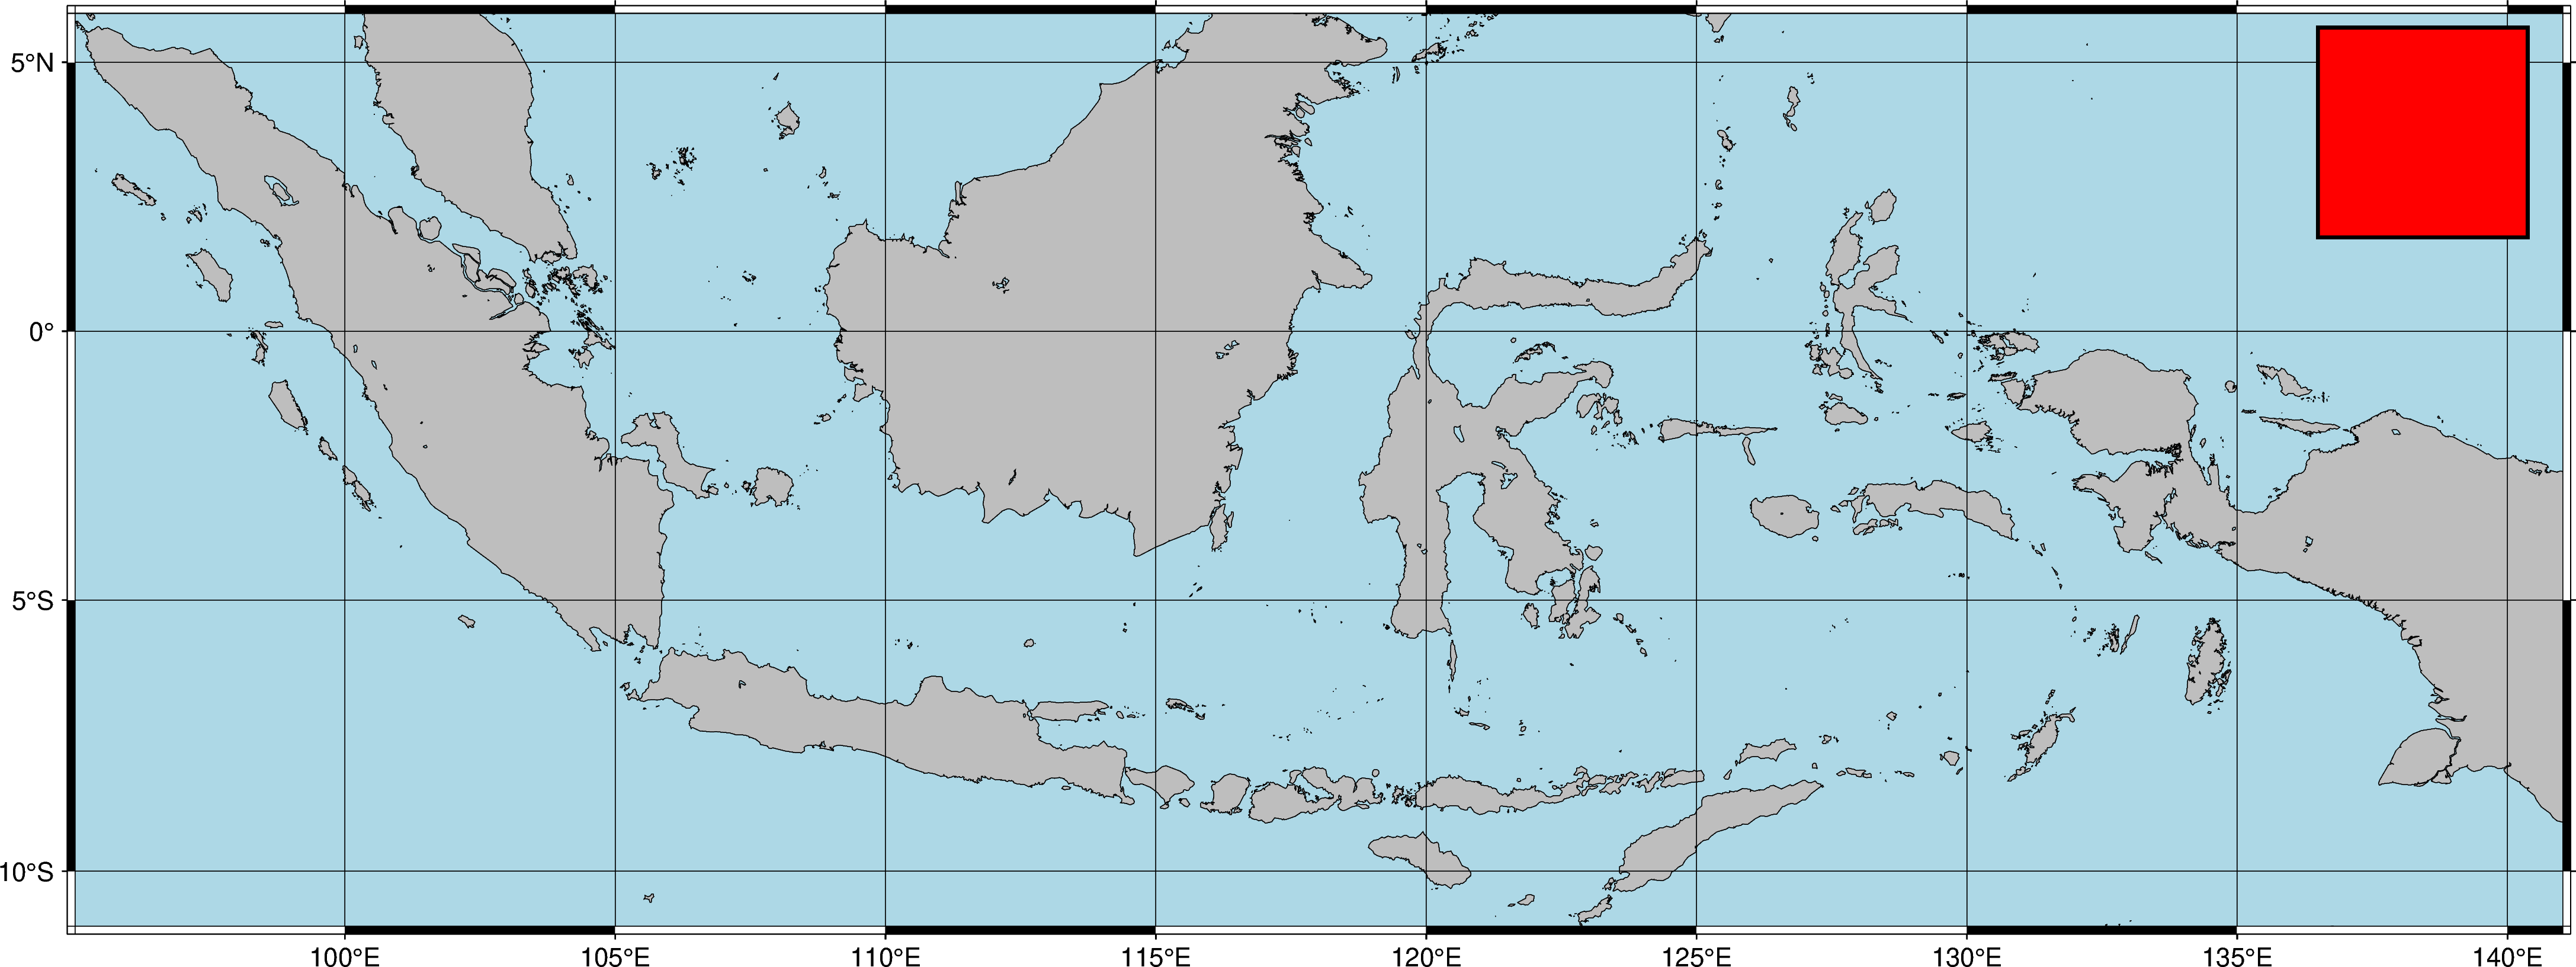

In [22]:
fig = pygmt.Figure()
fig.coast(
    region='ID',
    projection='M14i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame='ag'
)
with fig.inset(position="jTR+w3c+o0.5c/0.2c", box="+pblack+gred"):
    pass

fig.show()
fig.show(method='external')

Setelah itu, kita tambahkan peta global pada inset map dan menandai zona wilayah Indonesia dengan warna merah.
Contoh dari [`inset map`](https://www.pygmt.org/v0.3.0/gallery/plot/inset.html#). Pastikan ukuran inset pada argumen `position` sama dengan ukuran pada `projection`.

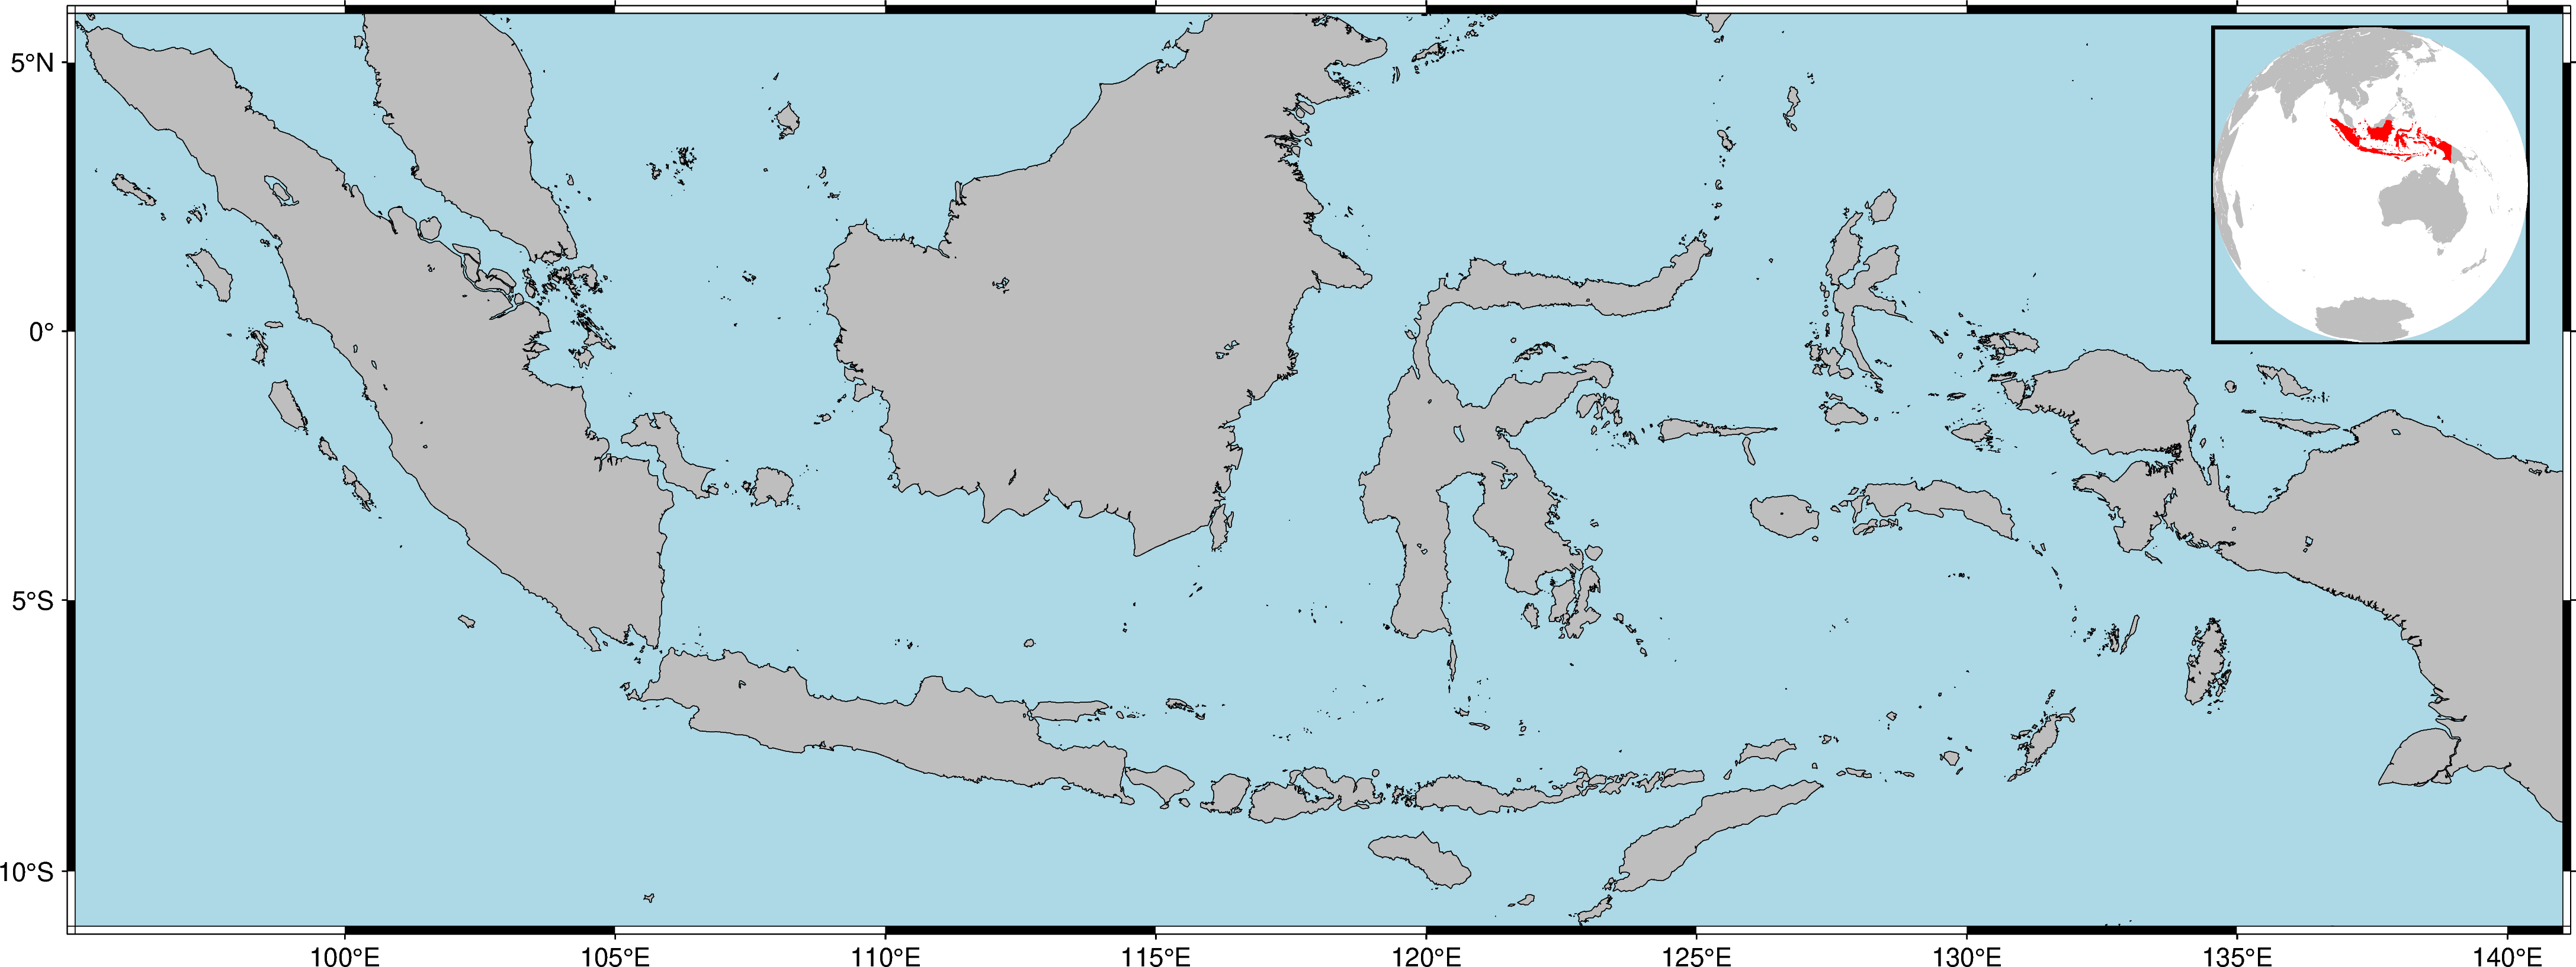

In [23]:
import pygmt
fig = pygmt.Figure()
fig.coast(
    region='ID',
    projection='M14i',
    shorelines=True,
    water='lightblue',
    land='grey',
    frame='a'
)
with fig.inset(position="jTR+w4.5c+o0.5c/0.2c", margin=0, box="+pblack"):
    fig.coast(
        region="g",
        projection="G110/-20/4.5c",
        land="gray", water="white",
        dcw="ID+gred"
    )
fig.show()
fig.show(method='external')

## 8. Pengaturan Projection

* Argumen `projection` berfungsi untuk mengatur proyeksi map yang ingin ditampilkan.
* Dalam pyGMT terdapat 31 proyeksi yang dapat digunakan (dapat dilihat pada [`Tabel Proyeksi`](https://www.pygmt.org/latest/projections/index.html#projection-table)).

Berikut ini adalah contoh dari proyeksi [`General Stereographic`](https://www.pygmt.org/latest/projections/azim/azim_general_stereographic.html#general-stereographic) dengan pusat proyeksi di salah satu kutub.

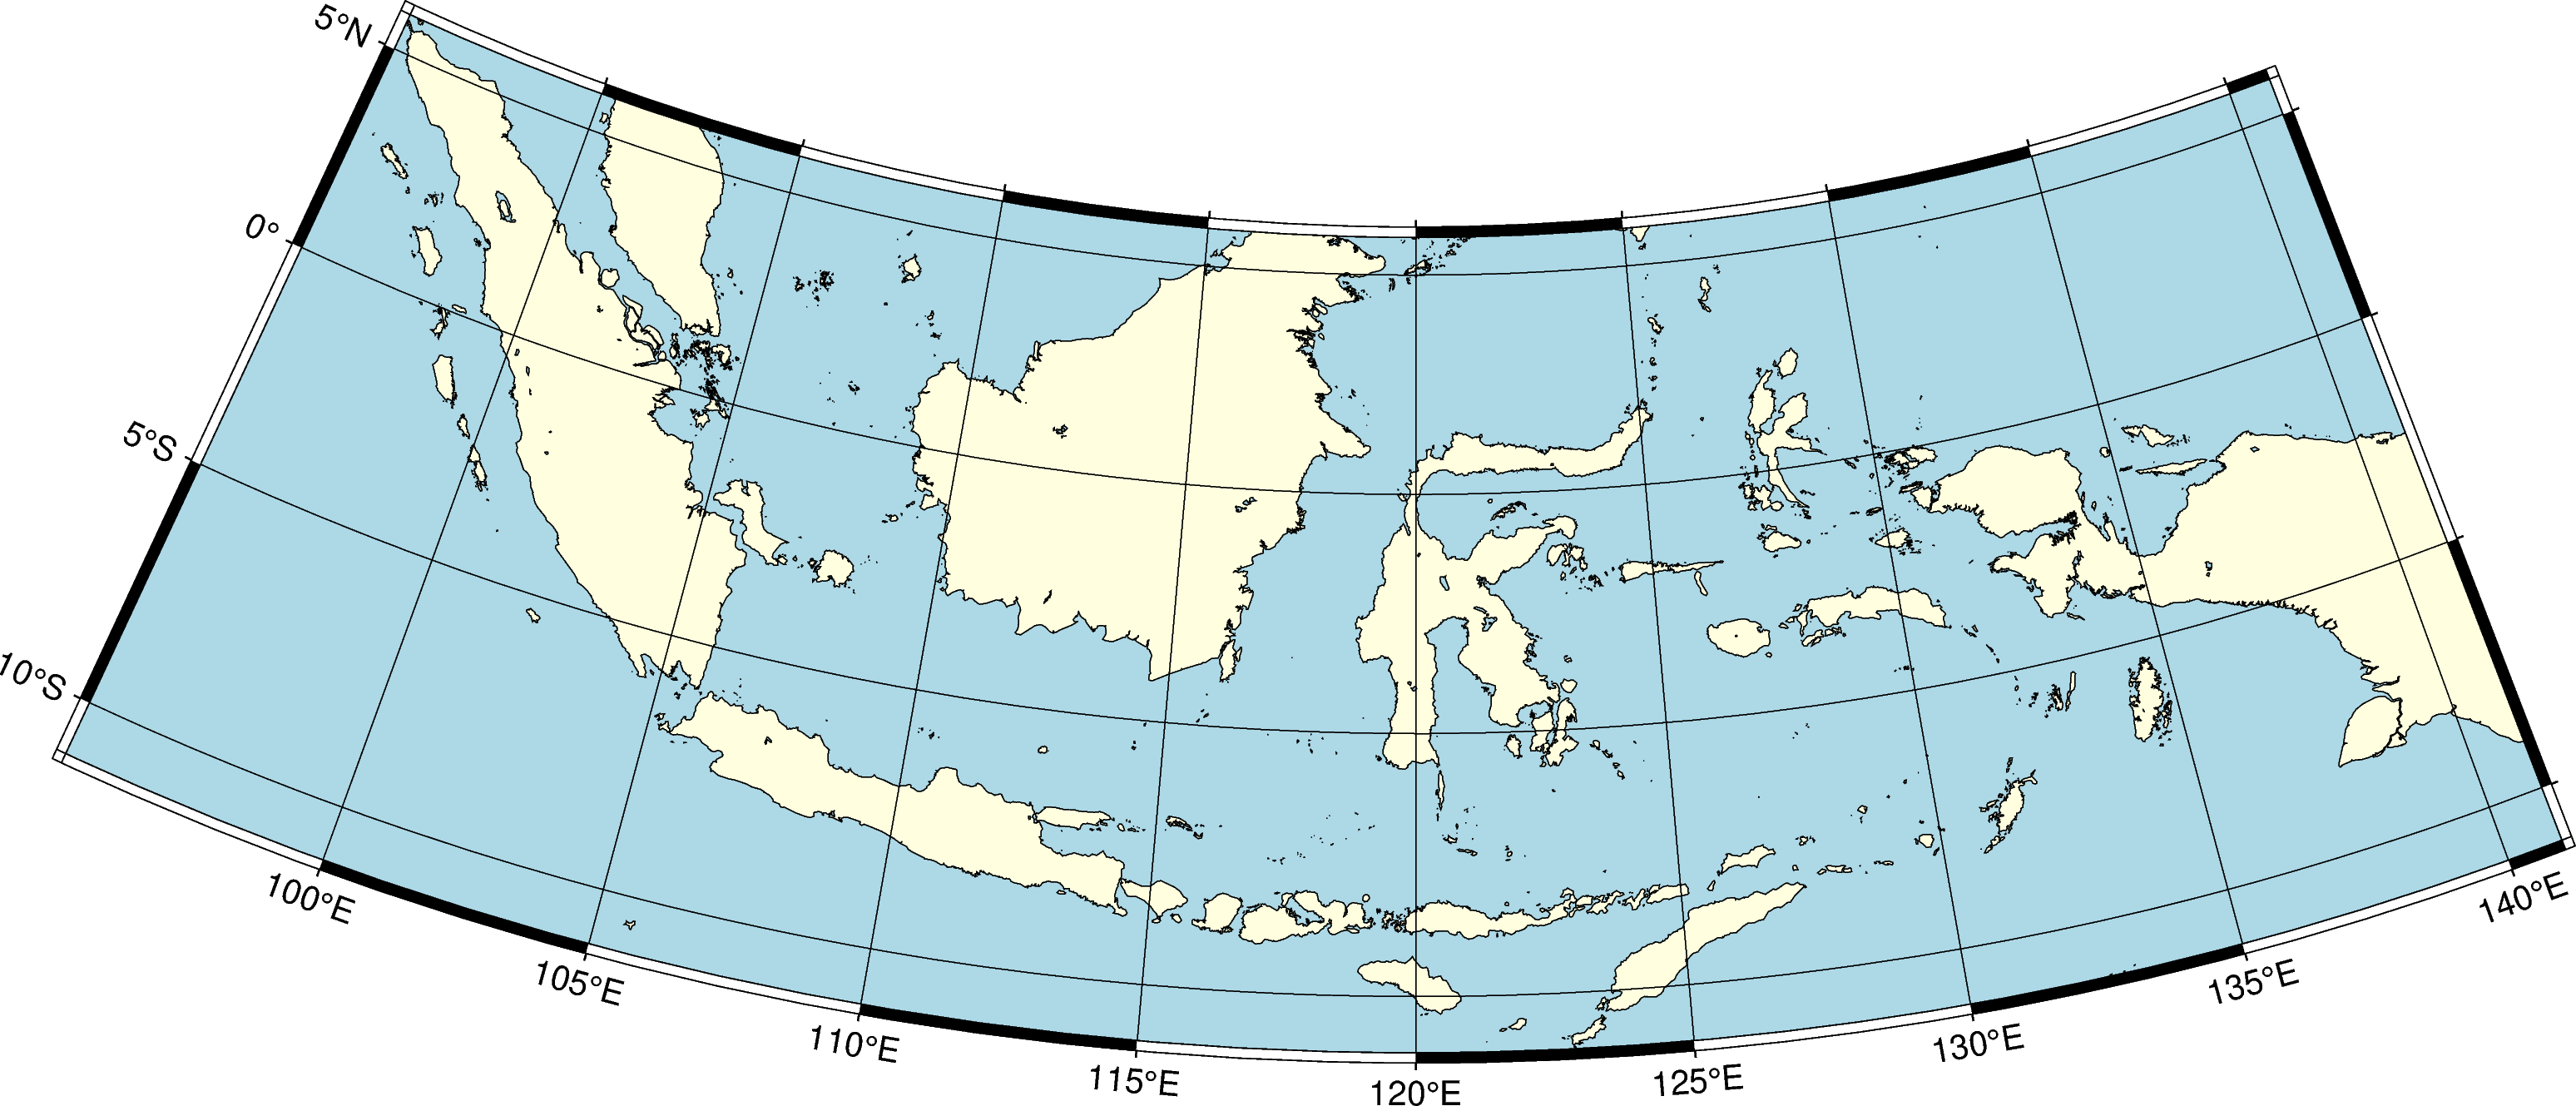

In [24]:
import pygmt
fig = pygmt.Figure()
fig.coast(region=['ID'], projection="S120/90/10i", shorelines=True, frame="ag",
          land="lightyellow", water='lightblue')
fig.show()
fig.show(method='external')